# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Drive mounting

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading dataset and checking top 5 and last 5 records

df = pd.read_csv('/content/drive/MyDrive/Colab/laptop_price.csv', encoding='latin-1')
df.head()


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
# checking shape

print('DataFrame Shape : ', df.shape)

DataFrame Shape :  (1303, 13)


In [5]:
# Checking columns

print('DataFrame Column: ',df.columns)
print('\n')
print('No. of  features: ',len(df.columns))

DataFrame Column:  Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')


No. of  features:  13


- **Dataset has 1303 samples data and 13 features. There are 12 independent features and 1 dependent feature. And Target feature is 'Price_euros.'**

In [6]:
# Removing column 'laptop_ID' as it doesn't affect much the price and unique for each laptop

df.drop('laptop_ID', axis = 1, inplace = True)

df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [7]:
# Basic information about dataset

print('Laptop_Price_Prediction_Dataset: \n')
df.info()

Laptop_Price_Prediction_Dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price_euros       1303 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


In [8]:
# Check missing values

print('Column-wise missing values count: \n')
df.isnull().sum()

Column-wise missing values count: 



,0
Company,0
Product,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0


- There is not any missing values in the dataset.

In [9]:
# Check any duplicated rows

print('No of duplicated records :',df.duplicated().sum())

No of duplicated records : 28


In [10]:
# Getting categorical and numerical features

cat_features = df.select_dtypes(include = 'object').columns
# alternate way : [feature for feature in df.columns if df[feature].dtypes == 'object']
num_features = df.select_dtypes(include = ['int32','int64','float32','float64']).columns
# alternate way : [feature for feature in df.columns if df[feature].dtypes != 'object']

In [11]:
print('Categorical Features list:\n')
print(cat_features)
print('-' * 100)
print('Numerical Features list:\n')
print(num_features)

Categorical Features list:

Index(['Company', 'Product', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight'],
      dtype='object')
----------------------------------------------------------------------------------------------------
Numerical Features list:

Index(['Inches', 'Price_euros'], dtype='object')


In [12]:
# Function to get unique values present in cols

def uniqueValues(feature):

    print(f'Unique values in {feature} is : {df[feature].unique()}')

for feature in cat_features:
    uniqueValues(feature)
    print('\n')
    print('-'*100)

Unique values in Company is : ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']


----------------------------------------------------------------------------------------------------
Unique values in Product is : ['MacBook Pro' 'Macbook Air' '250 G6' 'Aspire 3' 'ZenBook UX430UN'
 'Swift 3' 'Inspiron 3567' 'MacBook 12"' 'IdeaPad 320-15IKB' 'XPS 13'
 'Vivobook E200HA' 'Legion Y520-15IKBN' '255 G6' 'Inspiron 5379'
 '15-BS101nv (i7-8550U/8GB/256GB/FHD/W10)' 'MacBook Air' 'Inspiron 5570'
 'Latitude 5590' 'ProBook 470' 'LapBook 15.6"'
 'E402WA-GA010T (E2-6110/2GB/32GB/W10)'
 '17-ak001nv (A6-9220/4GB/500GB/Radeon' 'IdeaPad 120S-14IAP'
 'Inspiron 5770' 'ProBook 450' 'X540UA-DM186 (i3-6006U/4GB/1TB/FHD/Linux)'
 'Inspiron 7577' 'X542UQ-GO005 (i5-7200U/8GB/1TB/GeForce'
 'Aspire A515-51G' 'Inspiron 7773' 'IdeaPad 320-15ISK' 'Rog Strix'
 'X751NV-TY001T (N4200/4GB/1TB/GeForce' 'Yoga Book' '

**Observations**

- It is clear visible from the above data that features have alot text and for prediction we need numerical data.
- So to do so will need to do alot data(text) preprocessing.

In [13]:
# Let's start with feature 'RAM' and 'Weight' : from the observations if we remove GB and kg the easialy can be converted into int.

df['Ram'] = df['Ram'].str.replace('GB','').astype('int32')

df['Weight'] = df['Weight'].str.replace('kg','').astype('float32')

In [14]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [15]:
# Rename the 'Ram' -- 'Ram_GB' and 'Weight' -- 'Weight_Kg'

df.rename(columns = {'Ram':'Ram_GB','Weight':'Weight_KG'}, inplace = True)

df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram_GB,Memory,Gpu,OpSys,Weight_KG,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


# Exploratory Data Analysis

In [16]:
# Statistical Analysis: 5-Point Summary

df.describe()

,Inches,Ram_GB,Weight_KG,Price_euros
count,1303.000000,1303.000000,1303.000000,1303.000000
mean,15.017191,8.382195,2.038734,1123.686992
std,1.426304,5.084665,0.665475,699.009043
min,10.100000,2.000000,0.690000,174.000000
25%,14.000000,4.000000,1.500000,599.000000
50%,15.600000,8.000000,2.040000,977.000000
75%,15.600000,8.000000,2.300000,1487.880000
max,18.400000,64.000000,4.700000,6099.000000


- From above info it is clear that 'Price_euro' has skewness in data.

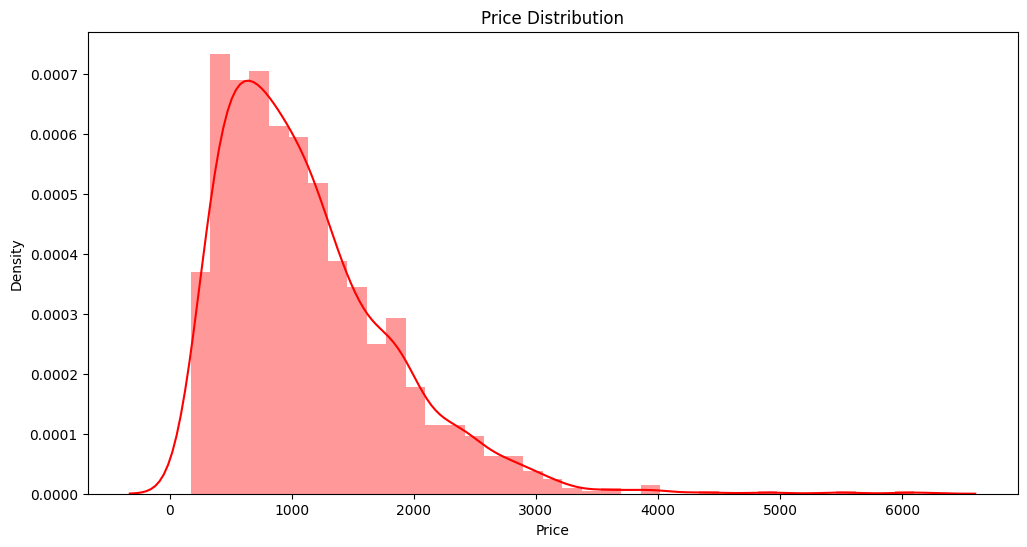

In [17]:
# From above analysis, it is clear that 'Price' feature has some skewness in data. So let's analyse the Feature 'Price_euro'

plt.figure(figsize = (12,6))
sns.distplot(df['Price_euros'], color = 'red')
plt.xlabel('Price')
plt.title('Price Distribution')
plt.show()

In [18]:
df['Price_euros'].skew()

1.5208655681688525

- Distribustion is slightly positive skeweed.

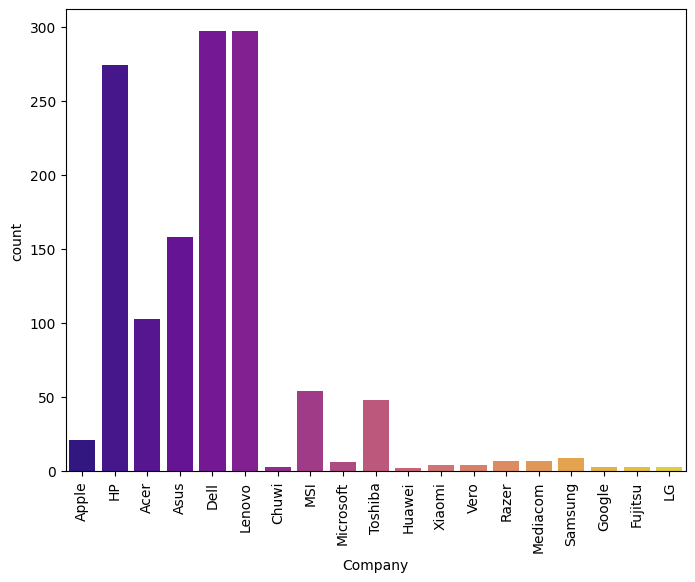

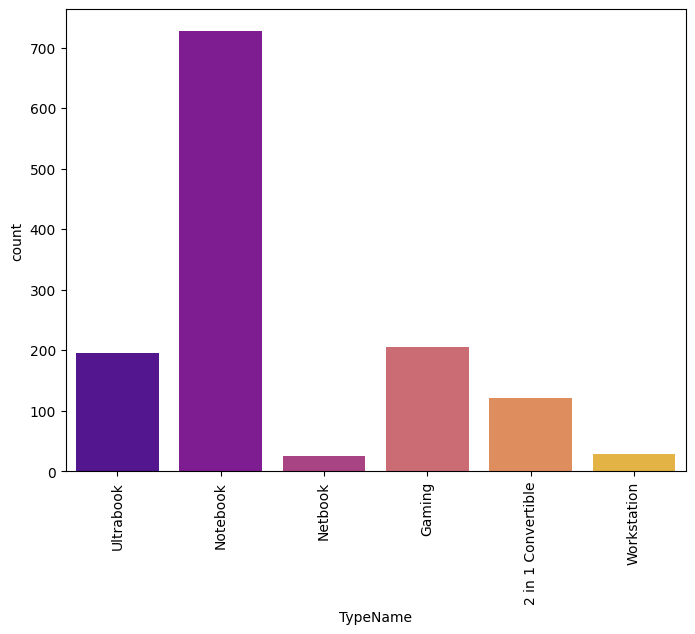

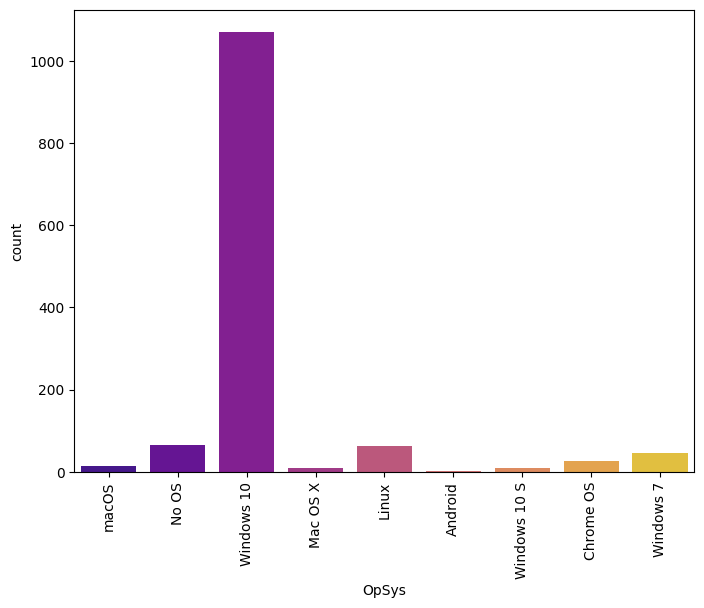

In [19]:
# Countplot for categorical feature having very less unique values

for feature in ['Company', 'TypeName', 'OpSys']:

    plt.figure(figsize = (8,6))
    sns.countplot(data = df, x = df[feature], palette = 'plasma')
    plt.xticks(rotation = 'vertical')


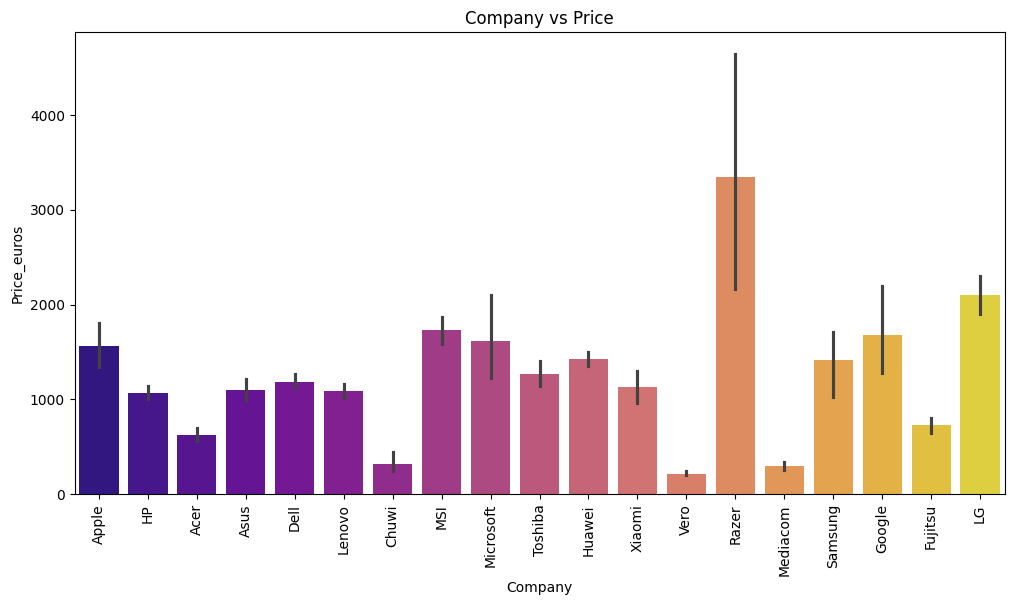

In [20]:
# Inflation check with 'Company'

plt.figure(figsize = (12,6))
sns.barplot(x = df.Company, y = df.Price_euros, palette = 'plasma')
plt.title('Company vs Price')
plt.xticks(rotation = 'vertical')
plt.show()

- From here we can get the price range of each brand laptops.

In [21]:
df['TypeName'].value_counts()

,count
TypeName,
Notebook,727
Gaming,205
Ultrabook,196
2 in 1 Convertible,121
Workstation,29
Netbook,25


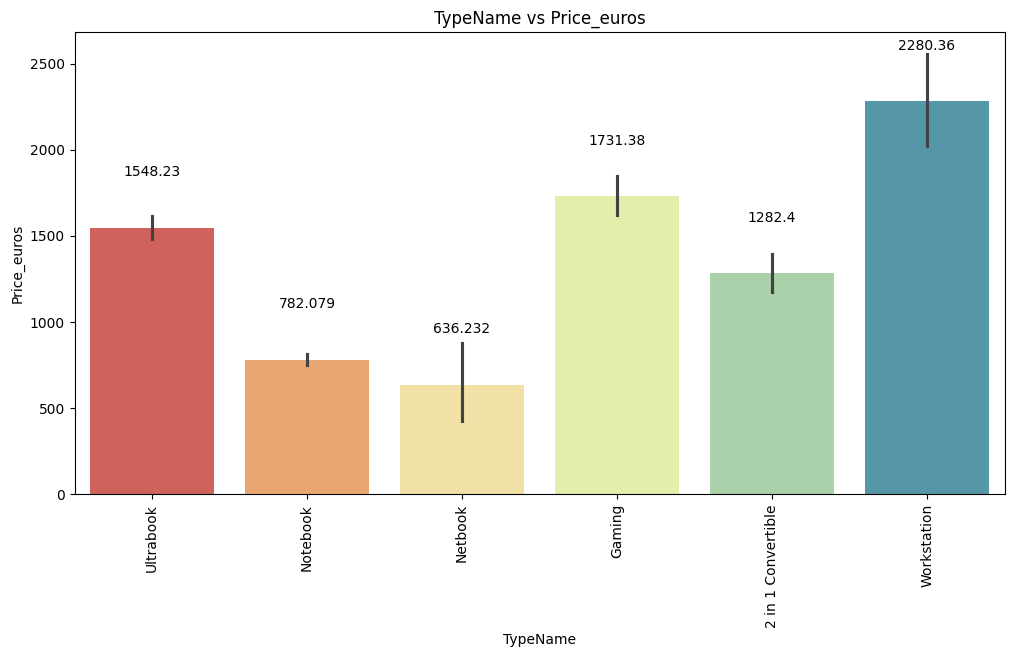

In [22]:
plt.figure(figsize = (12,6))
ax = sns.barplot(data = df, x = df['TypeName'], y = df['Price_euros'], palette = 'Spectral')

for label in ax.containers:
    ax.bar_label(label, padding=35)
plt.title('TypeName vs Price_euros')
plt.xticks(rotation = 'vertical')
plt.show()

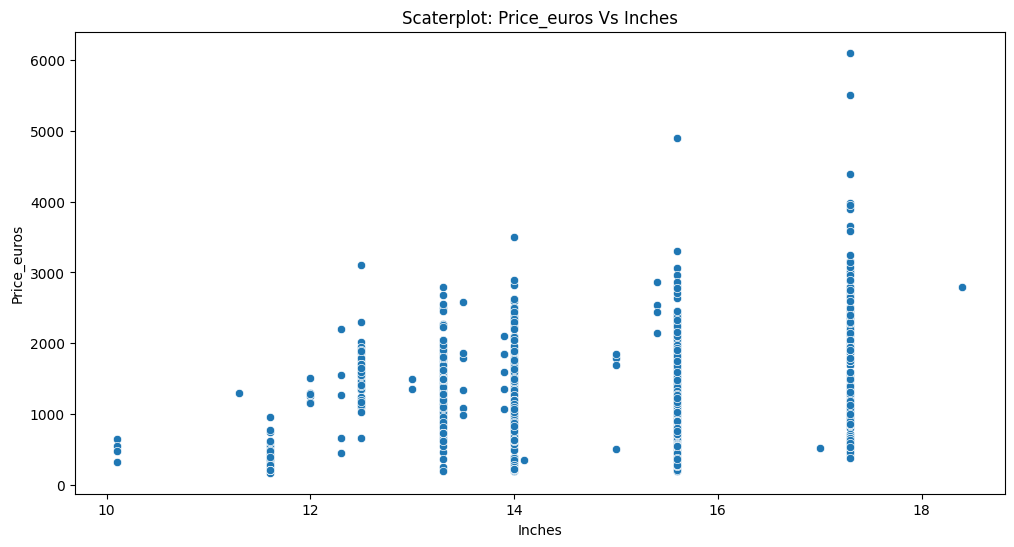

In [23]:
# Price_euros vs Inches

plt.figure(figsize = (12,6))
sns.scatterplot(data = df, x = df['Inches'], y = df['Price_euros'])
plt.title('Scaterplot: Price_euros Vs Inches')
plt.show()

In [24]:
df['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,507
1366x768,281
IPS Panel Full HD 1920x1080,230
IPS Panel Full HD / Touchscreen 1920x1080,53
Full HD / Touchscreen 1920x1080,47
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


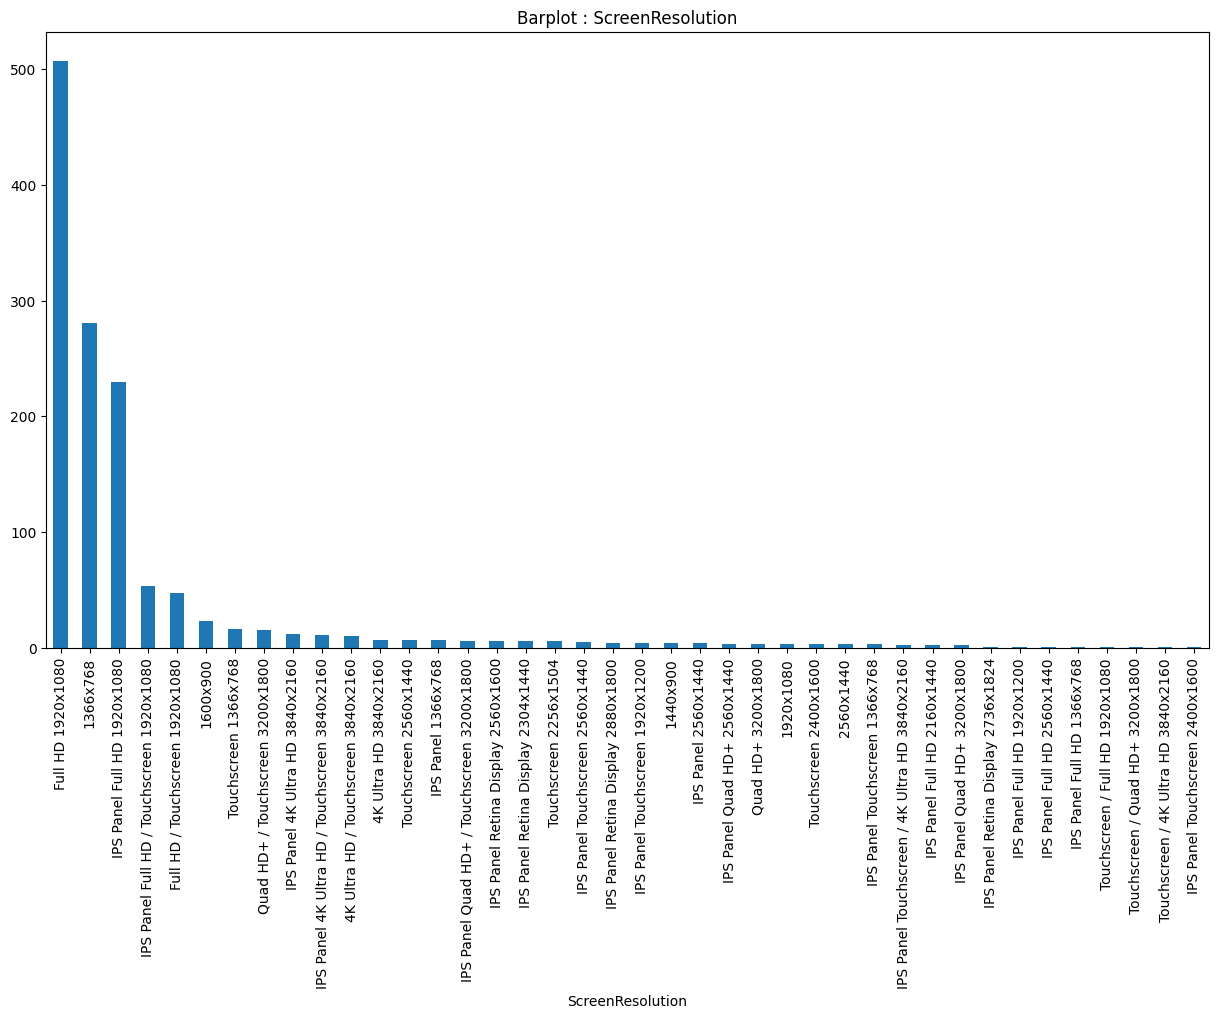

In [25]:
plt.figure(figsize = (15,8))
df['ScreenResolution'].value_counts().plot(kind='bar')
plt.title('Barplot : ScreenResolution')
plt.show()

In [26]:
# Create a feature 'TouchScreen'

df['TouchScreen'] = df['ScreenResolution'].apply(lambda element:1 if 'Touchscreen' in element else 0)

df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram_GB,Memory,Gpu,OpSys,Weight_KG,Price_euros,TouchScreen
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0


In [32]:
df['TouchScreen'].value_counts()

,count
TouchScreen,
0,1111
1,192


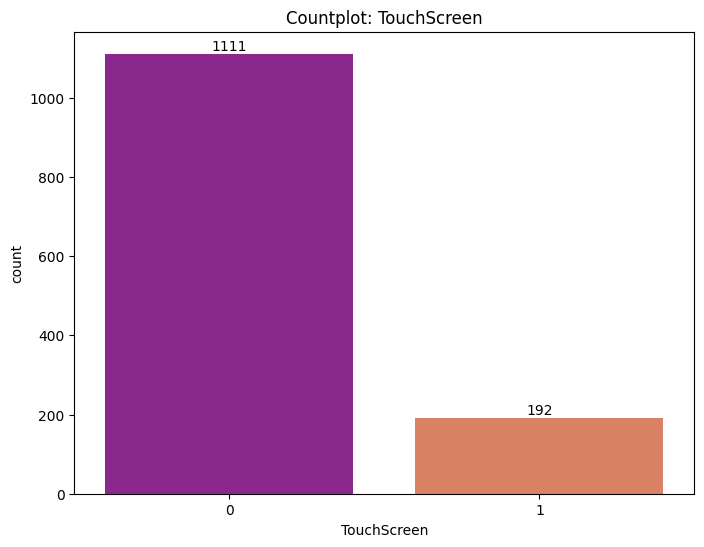

In [27]:
plt.figure(figsize = (8,6))
ax = sns.countplot(data = df, x = df['TouchScreen'], palette = 'plasma')
plt.title('Countplot: TouchScreen')

for label in ax.containers:
    ax.bar_label(label)

plt.show()


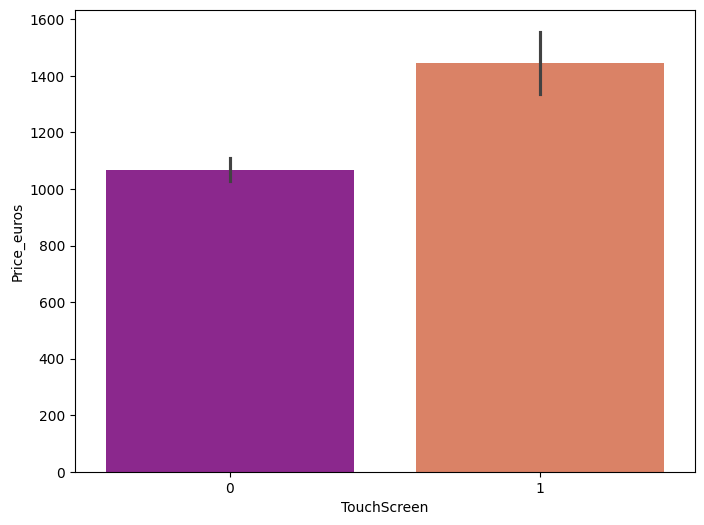

In [28]:
plt.figure(figsize = (8,6))
sns.barplot(data = df, x = df['TouchScreen'], y = df['Price_euros'],palette = 'plasma')
plt.show()

In [29]:
# Create a feature 'IPS'

df['IPS'] = df['ScreenResolution'].apply(lambda element:1 if 'IPS' in element else 0)

df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram_GB,Memory,Gpu,OpSys,Weight_KG,Price_euros,TouchScreen,IPS
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1


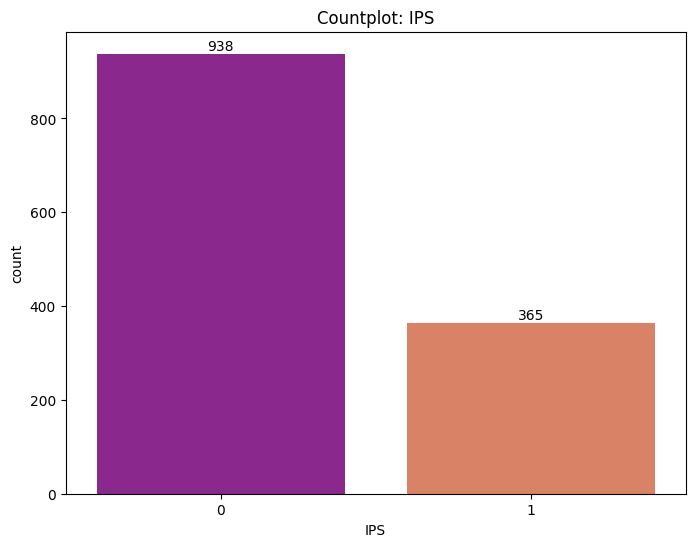

In [30]:
plt.figure(figsize = (8,6))
ax = sns.countplot(data = df, x = df['IPS'], palette = 'plasma')
plt.title('Countplot: IPS')

for label in ax.containers:
    ax.bar_label(label)
plt.show()

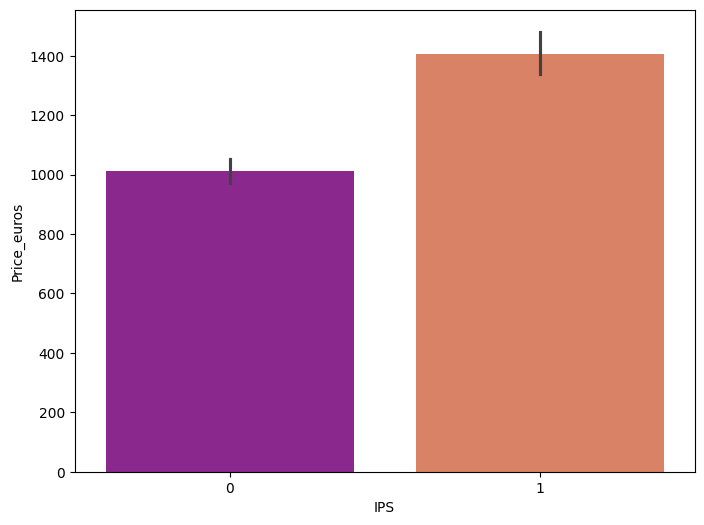

In [31]:
plt.figure(figsize = (8,6))
sns.barplot(data = df, x = df['IPS'], y = df['Price_euros'],palette = 'plasma')
plt.show()

In [32]:
# Extracting the X Resolution and Y Resolutions

df['ScreenResolution'].str.split('x',n=1,expand=True)

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [33]:
df['X_res'] = df['ScreenResolution'].str.split('x',n=1,expand=True)[0]
df['Y_res'] = df['ScreenResolution'].str.split('x',n=1,expand=True)[1]

In [34]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram_GB,Memory,Gpu,OpSys,Weight_KG,Price_euros,TouchScreen,IPS,X_res,Y_res
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,Full HD 1920,1080
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,IPS Panel Retina Display 2880,1800
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,IPS Panel Retina Display 2560,1600


In [35]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x : x[0])

In [36]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram_GB,Memory,Gpu,OpSys,Weight_KG,Price_euros,TouchScreen,IPS,X_res,Y_res
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram_GB            1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight_KG         1303 non-null   float32
 11  Price_euros       1303 non-null   float64
 12  TouchScreen       1303 non-null   int64  
 13  IPS               1303 non-null   int64  
 14  X_res             1303 non-null   object 
 15  Y_res             1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64

- from above it is clear that 'X_res' and 'Y_res' are categorical so needs to change in int.

In [38]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram_GB            1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight_KG         1303 non-null   float32
 11  Price_euros       1303 non-null   float64
 12  TouchScreen       1303 non-null   int64  
 13  IPS               1303 non-null   int64  
 14  X_res             1303 non-null   int64  
 15  Y_res             1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64

In [40]:
df['Product']

,Product
0,MacBook Pro
1,Macbook Air
2,250 G6
3,MacBook Pro
4,MacBook Pro
...,...
1298,Yoga 500-14ISK
1299,Yoga 900-13ISK
1300,IdeaPad 100S-14IBR
1301,15-AC110nv (i7-6500U/6GB/1TB/Radeon


In [41]:
df['Product'].value_counts()

,count
Product,
XPS 13,30
Inspiron 3567,29
250 G6,21
Legion Y520-15IKBN,19
Vostro 3568,19
...,...
15-bw007nv (A10-9620P/6GB/128GB/Radeon,1
SmartBook 130,1
A541NA-GO342 (N3350/4GB/500GB/Linux),1


- As there are 618 unique values in 'Product' in 1303 total observations, so will directly drop as it will not much affect the price.

In [42]:
# Droping feature 'Product'

df.drop('Product', axis=1,inplace=True)

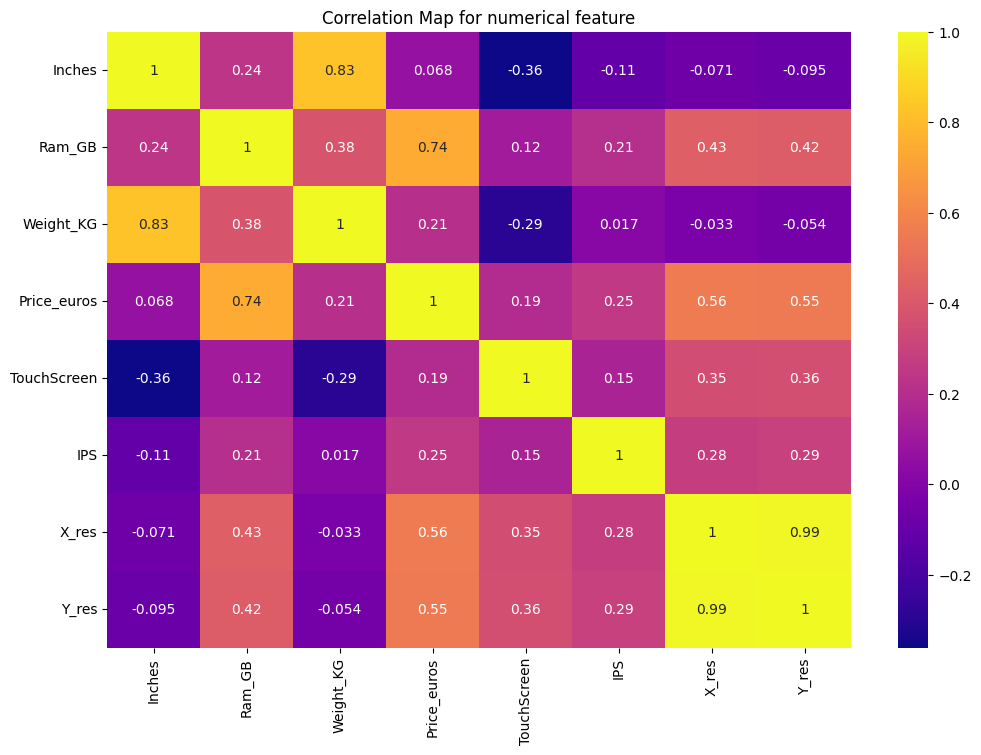

In [43]:
# Correlation

df_num = df[[feature for feature in df.columns if df[feature].dtypes != 'object']]

plt.figure(figsize = (12,8))
sns.heatmap(df_num.corr(), annot=True,cmap='plasma')
plt.title('Correlation Map for numerical feature')
plt.xticks(rotation='vertical')
plt.show()

In [44]:
df_num.corr()['Price_euros']

,Price_euros
Inches,0.068197
Ram_GB,0.743007
Weight_KG,0.210370
Price_euros,1.000000
TouchScreen,0.191226
IPS,0.252208
X_res,0.556529
Y_res,0.552809


- From above observations, it is clear that 'X_res' and 'Y_res' both are highly corelated and can affect the decision
- So I have created a new column named 'PPI(Pixel Per Inch). --> this is done by using following mathematical relation.


In [45]:
df['PPI'] = (np.round((df['X_res']**2 + df['Y_res']**2)**(1/2))/df['Inches']).astype('float')

In [46]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram_GB,Memory,Gpu,OpSys,Weight_KG,Price_euros,TouchScreen,IPS,X_res,Y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600,226.992481
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900,127.669173
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080,141.217949
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800,220.519481
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600,226.992481


In [47]:
df[['PPI','Price_euros']].corr()

,PPI,Price_euros
PPI,1.000000,0.473497
Price_euros,0.473497,1.000000


In [48]:
#Now we can delete 'Inches', 'X_res' and 'Y_res'

df.drop(columns = ['Inches','ScreenResolution', 'X_res','Y_res'], axis=1,inplace=True)
df.head()

,Company,TypeName,Cpu,Ram_GB,Memory,Gpu,OpSys,Weight_KG,Price_euros,TouchScreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.992481
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.669173
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.217949
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.519481
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.992481


In [49]:
df['Cpu'].value_counts()

,count
Cpu,
Intel Core i5 7200U 2.5GHz,190
Intel Core i7 7700HQ 2.8GHz,146
Intel Core i7 7500U 2.7GHz,134
Intel Core i7 8550U 1.8GHz,73
Intel Core i5 8250U 1.6GHz,72
...,...
Intel Core M M3-6Y30 0.9GHz,1
AMD A9-Series 9420 2.9GHz,1
Intel Core i3 6006U 2.2GHz,1


In [50]:
df['Cpu_name'] = df['Cpu'].apply(lambda text:" ".join(text.split()[:3]))
df.head()


,Company,TypeName,Cpu,Ram_GB,Memory,Gpu,OpSys,Weight_KG,Price_euros,TouchScreen,IPS,PPI,Cpu_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.992481,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.669173,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.217949,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.519481,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.992481,Intel Core i5


In [51]:
df['Cpu_name'].value_counts()

,count
Cpu_name,
Intel Core i7,527
Intel Core i5,423
Intel Core i3,136
Intel Celeron Dual,80
Intel Pentium Quad,27
Intel Core M,19
AMD A9-Series 9420,12
Intel Celeron Quad,8
AMD A6-Series 9220,8


In [52]:
def processortype(text):

    if text == 'Intel Core i5' or text == 'Intel Core i7' or text == 'Intel Core i3':
        return text

    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'


df['Cpu_name'] = df['Cpu_name'].apply(lambda text:processortype(text))
df.head()

,Company,TypeName,Cpu,Ram_GB,Memory,Gpu,OpSys,Weight_KG,Price_euros,TouchScreen,IPS,PPI,Cpu_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.992481,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.669173,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.217949,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.519481,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.992481,Intel Core i5


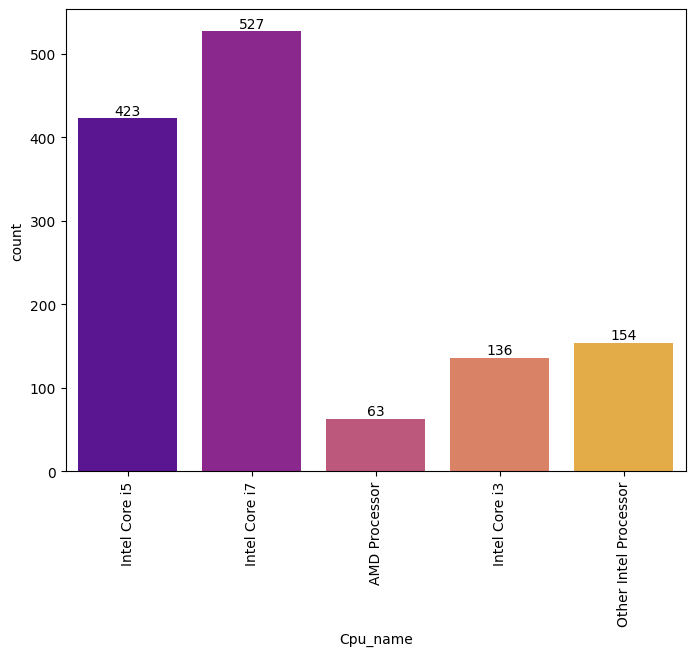

In [53]:
plt.figure(figsize = (8,6))
ax = sns.countplot(data = df, x = df['Cpu_name'], palette='plasma')
plt.xticks(rotation = 'vertical')

for label in ax.containers:
    ax.bar_label(label)
plt.show()

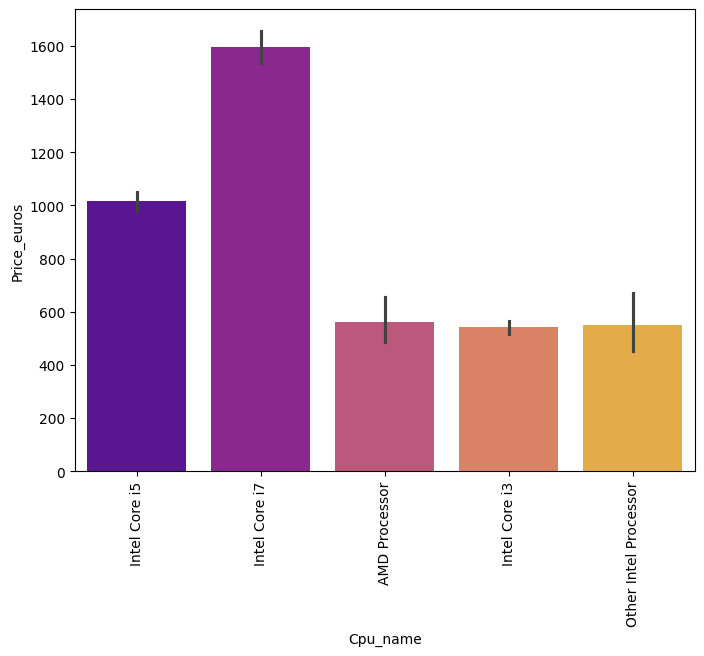

In [54]:
plt.figure(figsize = (8,6))
sns.barplot(data = df, x = df['Cpu_name'], y = df['Price_euros'], palette='plasma')
plt.xticks(rotation = 'vertical')
plt.show()

In [55]:
# Now we will drop the Cpu column

df.drop(columns = ['Cpu'], axis=1,inplace=True)

In [56]:
df.head()

,Company,TypeName,Ram_GB,Memory,Gpu,OpSys,Weight_KG,Price_euros,TouchScreen,IPS,PPI,Cpu_name
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.992481,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.669173,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.217949,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.519481,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.992481,Intel Core i5


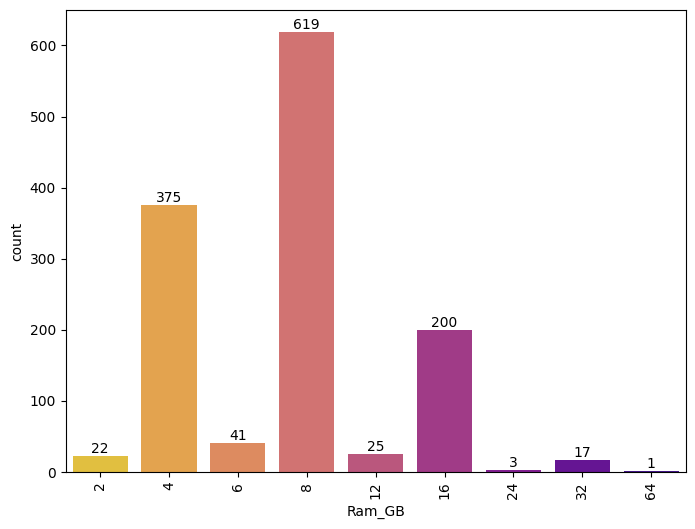

In [57]:
# Countplot of Ram

plt.figure(figsize = (8,6))
ax = sns.countplot(data = df, x = df['Ram_GB'], palette='plasma_r')
plt.xticks(rotation = 'vertical')

for label in ax.containers:
    ax.bar_label(label)
plt.show()

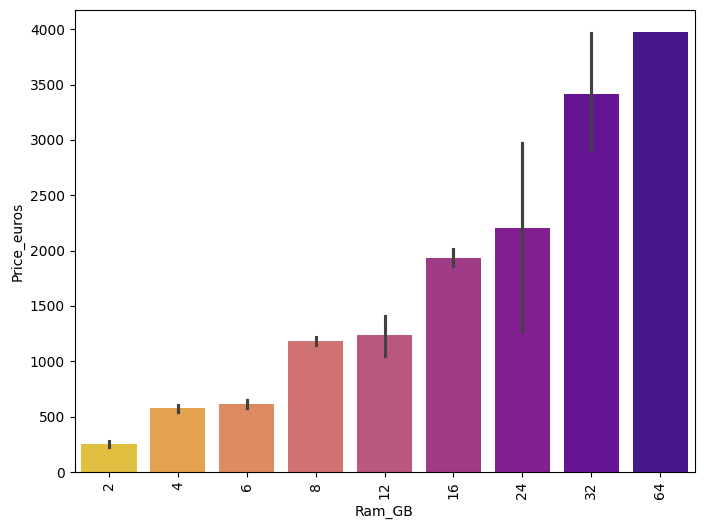

In [58]:
# Price variations w.r.t RAM

plt.figure(figsize = (8,6))
sns.barplot(data = df, x = df['Ram_GB'], y = df['Price_euros'], palette='plasma_r')
plt.xticks(rotation = 'vertical')
plt.show()

In [59]:
# 'Memory' Column

df['Memory'].value_counts()

,count
Memory,
256GB SSD,412
1TB HDD,223
500GB HDD,132
512GB SSD,118
128GB SSD + 1TB HDD,94
128GB SSD,76
256GB SSD + 1TB HDD,73
32GB Flash Storage,38
2TB HDD,16


In [60]:
# Preocess 'Memory' column

# Remove the decimal for example 1.0 = 1
df['Memory'] = df['Memory'].astype(str).replace('\.0','',regex=True)

# Remove GB
df['Memory'] = df['Memory'].str.replace('GB','')

# Removve TB with 000
df['Memory'] = df['Memory'].str.replace('TB','000')


In [61]:
df.Memory

,Memory
0,128 SSD
1,128 Flash Storage
2,256 SSD
3,512 SSD
4,256 SSD
...,...
1298,128 SSD
1299,512 SSD
1300,64 Flash Storage
1301,1000 HDD


In [62]:
# split the text across '+'
newdf = df['Memory'].str.split('+',n=1,expand=True)
newdf

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [63]:
df['Memory_first'] = newdf[0]
df['Memory_first'] = df['Memory_first'].str.strip()
df.head()

,Company,TypeName,Ram_GB,Memory,Gpu,OpSys,Weight_KG,Price_euros,TouchScreen,IPS,PPI,Cpu_name,Memory_first
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.992481,Intel Core i5,128 SSD
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.669173,Intel Core i5,128 Flash Storage
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.217949,Intel Core i5,256 SSD
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.519481,Intel Core i7,512 SSD
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.992481,Intel Core i5,256 SSD


In [64]:
def applychanges(value):

    df['Memory_first-'+value] = df['Memory_first'].apply(lambda x:1 if value in x else 0)

valueList = ['SSD', 'HDD', 'Hybrid', 'Flash Storage']
for value in valueList:
    applychanges(value)

df.sample(10)

,Company,TypeName,Ram_GB,Memory,Gpu,OpSys,Weight_KG,Price_euros,TouchScreen,IPS,PPI,Cpu_name,Memory_first,Memory_first-SSD,Memory_first-HDD,Memory_first-Hybrid,Memory_first-Flash Storage
999,HP,Ultrabook,8,512 SSD,Intel HD Graphics 620,Windows 10,1.48,2089.0,0,0,157.357143,Intel Core i7,512 SSD,1,0,0,0
227,Asus,Notebook,8,256 SSD,Nvidia GeForce 920MX,Windows 10,2.00,769.0,0,0,141.217949,Intel Core i5,256 SSD,1,0,0,0
376,Lenovo,Netbook,4,128 SSD,Intel HD Graphics 500,Windows 10,1.59,553.0,0,1,135.086207,Other Intel Processor,128 SSD,1,0,0,0
634,Asus,Notebook,8,1000 HDD,Intel HD Graphics 500,Windows 10,2.00,399.0,0,0,100.448718,Other Intel Processor,1000 HDD,0,1,0,0
984,Toshiba,Notebook,4,500 HDD,Intel HD Graphics 520,Windows 10,1.75,915.0,0,0,111.928571,Intel Core i5,500 HDD,0,1,0,0
1301,HP,Notebook,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,764.0,0,0,100.448718,Intel Core i7,1000 HDD,0,1,0,0
952,Toshiba,Notebook,8,256 SSD,Intel HD Graphics 520,Windows 7,1.20,1460.0,0,0,165.639098,Intel Core i5,256 SSD,1,0,0,0
1279,Lenovo,Notebook,8,1000 HDD,Nvidia GeForce GTX 960M,Windows 10,2.60,899.0,0,1,141.217949,Intel Core i7,1000 HDD,0,1,0,0
864,Dell,Ultrabook,16,512 SSD,Intel Iris Plus Graphics 640,Windows 10,1.29,2240.0,1,0,276.090226,Intel Core i7,512 SSD,1,0,0,0
1028,Dell,Ultrabook,8,256 SSD,Intel HD Graphics 620,Windows 10,1.29,1624.0,1,0,276.090226,Intel Core i5,256 SSD,1,0,0,0


In [65]:
# Remove all the characters just keep the numbers
df['Memory_first'] = df['Memory_first'].str.replace(r'\D','',regex=True)
df['Memory_first'].value_counts()

,count
Memory_first,
256,508
1000,250
128,177
512,140
500,132
32,45
64,17
2000,16
16,10


In [66]:
df['Memory_second'] = newdf[1]
df.head()

,Company,TypeName,Ram_GB,Memory,Gpu,OpSys,Weight_KG,Price_euros,TouchScreen,IPS,PPI,Cpu_name,Memory_first,Memory_first-SSD,Memory_first-HDD,Memory_first-Hybrid,Memory_first-Flash Storage,Memory_second
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.992481,Intel Core i5,128,1,0,0,0,None
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.669173,Intel Core i5,128,0,0,0,1,None
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.217949,Intel Core i5,256,1,0,0,0,None
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.519481,Intel Core i7,512,1,0,0,0,None
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.992481,Intel Core i5,256,1,0,0,0,None


In [67]:
df['Memory_second'].isnull().sum()

1095

In [68]:
df['Memory_second'] = df['Memory_second'].fillna("0")
df['Memory_second'].value_counts()

,count
Memory_second,
0,1095
1000 HDD,185
2000 HDD,15
256 SSD,3
500 HDD,2
1000 Hybrid,2
512 SSD,1


In [69]:
def applychanges2(value):

    df['Memory_second-'+value] = df['Memory_second'].apply(lambda x:1 if value in x else 0)

valueList = ['SSD', 'HDD', 'Hybrid', 'Flash Storage']

for value in valueList:
    applychanges2(value)



In [70]:
# Remove all the characters just keep the numbers
df['Memory_second'] = df['Memory_second'].str.replace(r'\D','',regex=True)
df['Memory_second'].value_counts()

,count
Memory_second,
0,1095
1000,187
2000,15
256,3
500,2
512,1


In [71]:
df['Memory_first'] = df['Memory_first'].astype('int')
df['Memory_second'] = df['Memory_second'].astype('int')

In [72]:
df.sample(5)

,Company,TypeName,Ram_GB,Memory,Gpu,OpSys,Weight_KG,Price_euros,TouchScreen,IPS,...,Memory_first,Memory_first-SSD,Memory_first-HDD,Memory_first-Hybrid,Memory_first-Flash Storage,Memory_second,Memory_second-SSD,Memory_second-HDD,Memory_second-Hybrid,Memory_second-Flash Storage
813,Dell,Notebook,8,1000 HDD,Nvidia GeForce GT 940MX,Windows 10,1.98,961.00,0,0,...,1000,0,1,0,0,0,0,0,0,0
641,HP,Notebook,8,1000 HDD,AMD Radeon R5,Windows 10,2.60,520.90,0,0,...,1000,0,1,0,0,0,0,0,0,0
1093,Dell,Ultrabook,4,256 SSD,AMD Radeon 530,Windows 10,1.40,818.35,0,1,...,256,1,0,0,0,0,0,0,0,0
24,HP,Ultrabook,8,256 SSD,Intel HD Graphics 620,Windows 10,1.91,659.00,0,0,...,256,1,0,0,0,0,0,0,0,0
318,HP,Notebook,8,256 SSD,Intel HD Graphics 620,Windows 10,1.95,980.00,0,0,...,256,1,0,0,0,0,0,0,0,0


In [73]:
# Multiplying the column and storing the result in sunsequent column

df['HDD'] = (df['Memory_first']*df['Memory_first-HDD']+df['Memory_second']*df['Memory_second-HDD'])
df['SSD'] = (df['Memory_first']*df['Memory_first-SSD']+df['Memory_second']*df['Memory_second-SSD'])
df['Hybrid'] = (df['Memory_first']*df['Memory_first-Hybrid']+df['Memory_second']*df['Memory_second-Hybrid'])
df['Flash Storage'] = (df['Memory_first']*df['Memory_first-Flash Storage']+df['Memory_second']*df['Memory_second-Flash Storage'])

In [74]:
df.head()

,Company,TypeName,Ram_GB,Memory,Gpu,OpSys,Weight_KG,Price_euros,TouchScreen,IPS,...,Memory_first-Flash Storage,Memory_second,Memory_second-SSD,Memory_second-HDD,Memory_second-Hybrid,Memory_second-Flash Storage,HDD,SSD,Hybrid,Flash Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,...,0,0,0,0,0,0,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,...,1,0,0,0,0,0,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,...,0,0,0,0,0,0,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,...,0,0,0,0,0,0,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,...,0,0,0,0,0,0,0,256,0,0


In [75]:
df.columns

Index(['Company', 'TypeName', 'Ram_GB', 'Memory', 'Gpu', 'OpSys', 'Weight_KG',
       'Price_euros', 'TouchScreen', 'IPS', 'PPI', 'Cpu_name', 'Memory_first',
       'Memory_first-SSD', 'Memory_first-HDD', 'Memory_first-Hybrid',
       'Memory_first-Flash Storage', 'Memory_second', 'Memory_second-SSD',
       'Memory_second-HDD', 'Memory_second-Hybrid',
       'Memory_second-Flash Storage', 'HDD', 'SSD', 'Hybrid', 'Flash Storage'],
      dtype='object')

In [76]:
df.drop(columns = ['Memory_first','Memory_second','Memory_first-SSD', 'Memory_first-HDD', 'Memory_first-Hybrid',
                   'Memory_first-Flash Storage','Memory_second-SSD','Memory_second-HDD', 'Memory_second-Hybrid',
                   'Memory_second-Flash Storage'], axis = 1,inplace = True)

In [77]:
df.head()

,Company,TypeName,Ram_GB,Memory,Gpu,OpSys,Weight_KG,Price_euros,TouchScreen,IPS,PPI,Cpu_name,HDD,SSD,Hybrid,Flash Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.992481,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.669173,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.217949,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.519481,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.992481,Intel Core i5,0,256,0,0


In [78]:
df.drop(columns = ['Memory'],axis = 1, inplace = True)

In [79]:
df.shape

(1303, 15)

In [80]:
df.head()

,Company,TypeName,Ram_GB,Gpu,OpSys,Weight_KG,Price_euros,TouchScreen,IPS,PPI,Cpu_name,HDD,SSD,Hybrid,Flash Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.992481,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.669173,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.217949,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.519481,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.992481,Intel Core i5,0,256,0,0


In [81]:
df[['HDD','SSD','Hybrid','Flash Storage','Price_euros']].corr()

,HDD,SSD,Hybrid,Flash Storage,Price_euros
HDD,1.000000,-0.399896,-0.076596,-0.117658,-0.096441
SSD,-0.399896,1.000000,-0.059750,-0.147991,0.670799
Hybrid,-0.076596,-0.059750,1.000000,-0.014368,0.007989
Flash Storage,-0.117658,-0.147991,-0.014368,1.000000,-0.040511
Price_euros,-0.096441,0.670799,0.007989,-0.040511,1.000000


- From the above relation it is clear that "Hybrid", "Flash Storage" has almost negligible corelation with price.
- Also it has negative correlation with "HDD" as day by day people preferring 'SSD' over 'HDD'

In [82]:
# so drop the Hybrid and Flash Storagre column

df.drop(columns = ['Hybrid','Flash Storage'], axis = 1, inplace = True)

In [85]:
df.head()

,Company,TypeName,Ram_GB,Gpu,OpSys,Weight_KG,Price_euros,TouchScreen,IPS,PPI,Cpu_name,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.992481,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.669173,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.217949,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.519481,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.992481,Intel Core i5,0,256


In [86]:
# Analysing 'Gpu'

df['Gpu'].value_counts()

,count
Gpu,
Intel HD Graphics 620,281
Intel HD Graphics 520,185
Intel UHD Graphics 620,68
Nvidia GeForce GTX 1050,66
Nvidia GeForce GTX 1060,48
...,...
AMD Radeon R5 520,1
AMD Radeon R7,1
Intel HD Graphics 540,1


In [87]:
df['Gpu_brand'] = df['Gpu'].str.split(' ').apply(lambda x:x[0])

In [88]:
df['Gpu_brand'].value_counts()

,count
Gpu_brand,
Intel,722
Nvidia,400
AMD,180
ARM,1


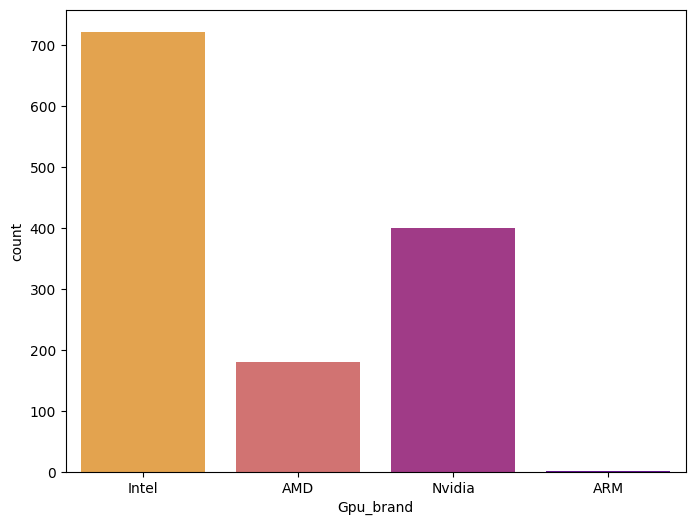

In [89]:
plt.figure(figsize = (8,6))
sns.countplot(data = df, x = df['Gpu_brand'], palette = 'plasma_r')
plt.show()

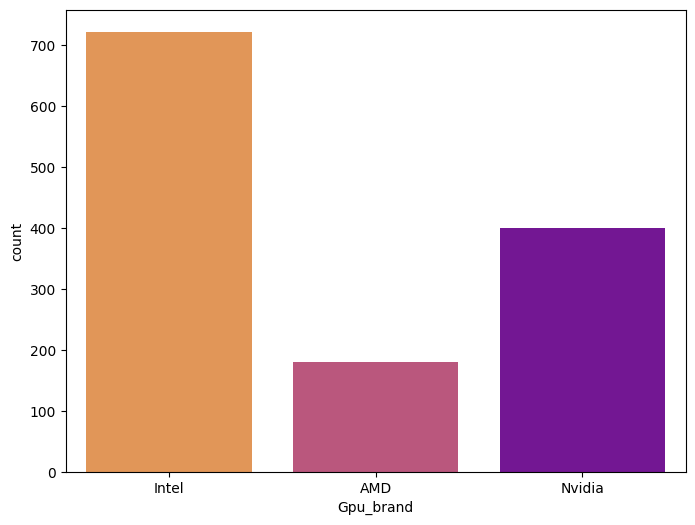

In [90]:
# Remove all laptop have gpu brand 'ARM'

df = df[df['Gpu_brand'] != 'ARM']

plt.figure(figsize = (8,6))
sns.countplot(data = df, x = df['Gpu_brand'], palette = 'plasma_r')
plt.show()

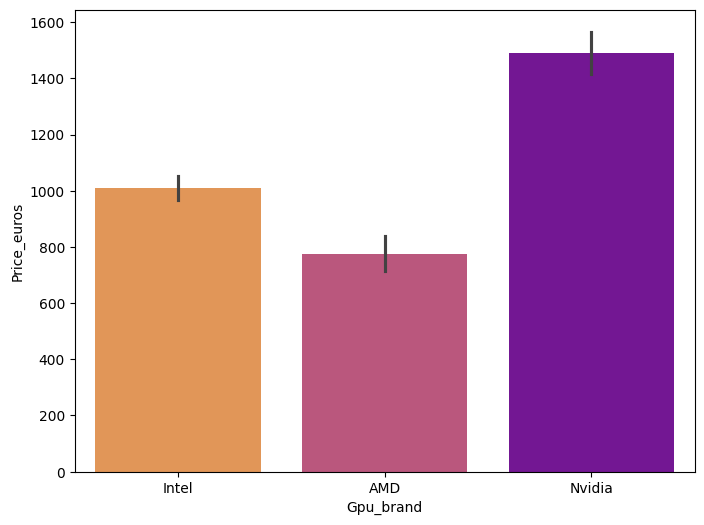

In [91]:
plt.figure(figsize = (8,6))
sns.barplot(data = df, x = df['Gpu_brand'], y = df['Price_euros'], palette = 'plasma_r')
plt.show()

In [92]:
df.drop(columns = ['Gpu'], axis = 1, inplace = True)

In [93]:
df.head()

,Company,TypeName,Ram_GB,OpSys,Weight_KG,Price_euros,TouchScreen,IPS,PPI,Cpu_name,HDD,SSD,Gpu_brand
0,Apple,Ultrabook,8,macOS,1.37,1339.69,0,1,226.992481,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,898.94,0,0,127.669173,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,575.00,0,0,141.217949,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,2537.45,0,1,220.519481,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,1803.60,0,1,226.992481,Intel Core i5,0,256,Intel


In [94]:
# Operating System Analysis

df['OpSys'].value_counts()

,count
OpSys,
Windows 10,1072
No OS,66
Linux,62
Windows 7,45
Chrome OS,26
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


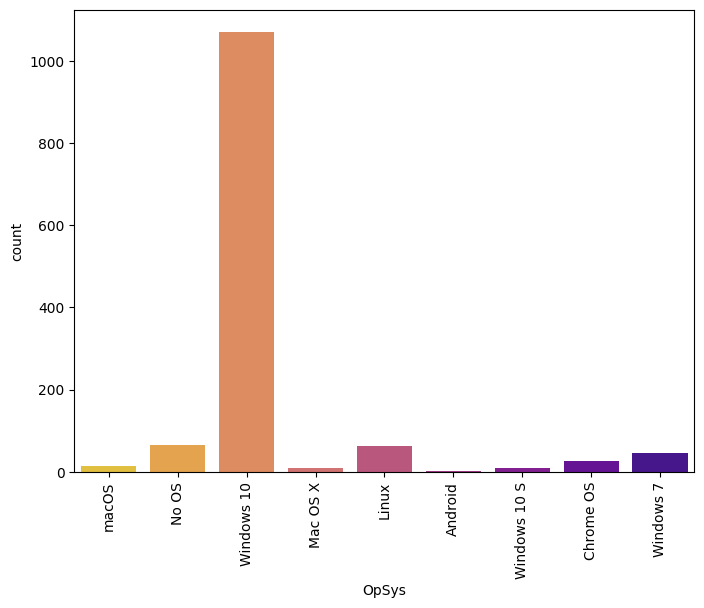

In [95]:
# Countplot

plt.figure(figsize = (8,6))
sns.countplot(data = df, x = df['OpSys'], palette = 'plasma_r')
plt.xticks(rotation = 'vertical')
plt.show()

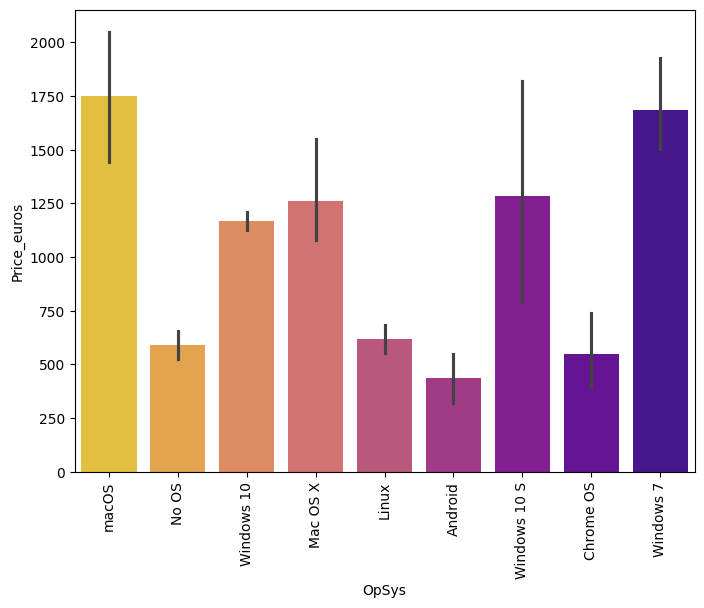

In [96]:
# Variation in price

plt.figure(figsize = (8,6))
sns.barplot(data = df, x = df['OpSys'], y = df['Price_euros'], palette = 'plasma_r')
plt.xticks(rotation = 'vertical')
plt.show()

In [97]:
# Clubing Windows all variations

def clubWindows(text):

    if text == 'Windows 10' or text == 'Windows 10 S' or text == 'Windows 7':
        return 'Windows'
    elif text == 'Mac OS X' or text == 'macOS':
        return 'MaC'
    else:
        return 'Others'

df['OpSys'] = df['OpSys'].apply(lambda x:clubWindows(x))
df['OpSys'].value_counts()

,count
OpSys,
Windows,1125
Others,156
MaC,21


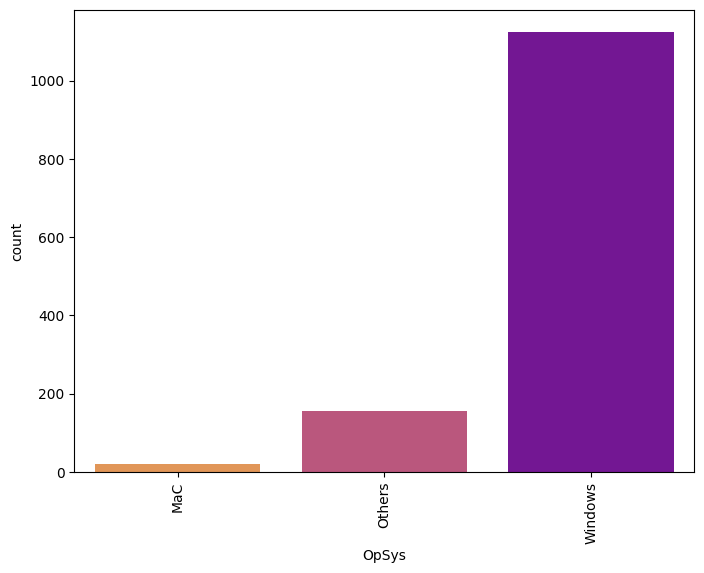

In [98]:
plt.figure(figsize = (8,6))
sns.countplot(data = df, x = df['OpSys'], palette = 'plasma_r')
plt.xticks(rotation = 'vertical')
plt.show()

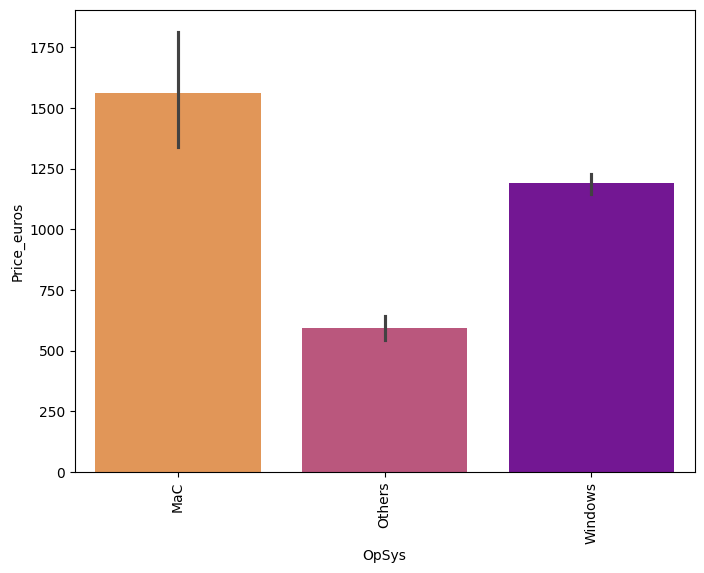

In [99]:
# Variation in price

plt.figure(figsize = (8,6))
sns.barplot(data = df, x = df['OpSys'], y = df['Price_euros'], palette = 'plasma_r')
plt.xticks(rotation = 'vertical')
plt.show()

In [100]:
# Weight Analysis

df['Weight_KG']

,Weight_KG
0,1.37
1,1.34
2,1.86
3,1.83
4,1.37
...,...
1298,1.80
1299,1.30
1300,1.50
1301,2.19


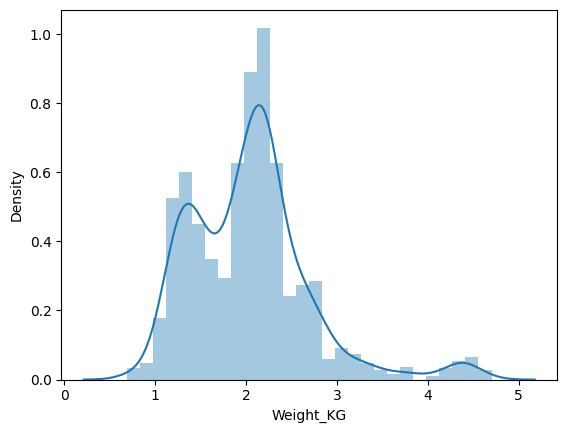

In [101]:
# Distribution plot

sns.distplot(df['Weight_KG'])
plt.show()

<Axes: xlabel='Weight_KG', ylabel='Price_euros'>

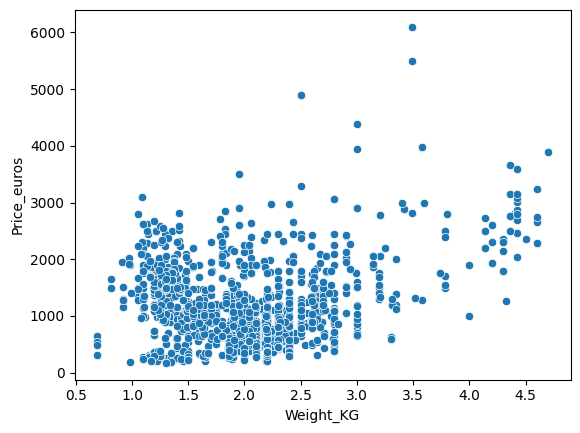

In [102]:
# Price variations w.r.t Weight

sns.scatterplot(data = df, x = df['Weight_KG'], y = df['Price_euros'])

<Axes: xlabel='Price_euros', ylabel='Density'>

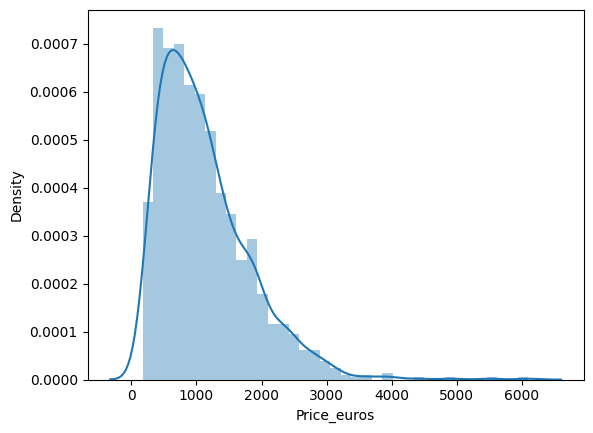

In [103]:
# Price analysis

sns.distplot(df['Price_euros'])

<Axes: xlabel='Price_euros', ylabel='Density'>

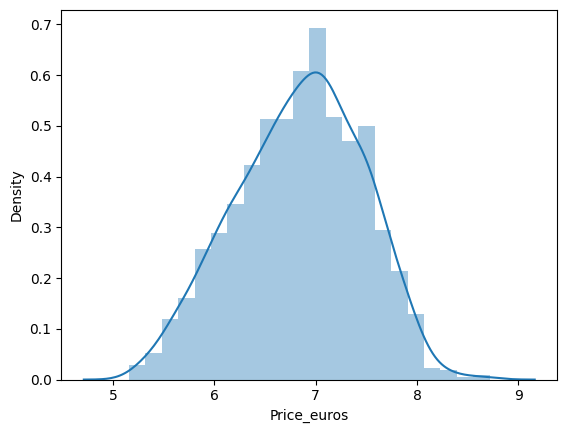

In [104]:
# apply log to normaize price

sns.distplot(np.log(df['Price_euros']))

In [105]:
df.head()

,Company,TypeName,Ram_GB,OpSys,Weight_KG,Price_euros,TouchScreen,IPS,PPI,Cpu_name,HDD,SSD,Gpu_brand
0,Apple,Ultrabook,8,MaC,1.37,1339.69,0,1,226.992481,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,MaC,1.34,898.94,0,0,127.669173,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Others,1.86,575.00,0,0,141.217949,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,MaC,1.83,2537.45,0,1,220.519481,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,MaC,1.37,1803.60,0,1,226.992481,Intel Core i5,0,256,Intel


In [106]:
df_clean = df.copy()
df_clean

,Company,TypeName,Ram_GB,OpSys,Weight_KG,Price_euros,TouchScreen,IPS,PPI,Cpu_name,HDD,SSD,Gpu_brand
0,Apple,Ultrabook,8,MaC,1.37,1339.69,0,1,226.992481,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,MaC,1.34,898.94,0,0,127.669173,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Others,1.86,575.00,0,0,141.217949,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,MaC,1.83,2537.45,0,1,220.519481,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,MaC,1.37,1803.60,0,1,226.992481,Intel Core i5,0,256,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows,1.80,638.00,1,1,157.357143,Intel Core i7,0,128,Intel
1299,Lenovo,2 in 1 Convertible,16,Windows,1.30,1499.00,1,1,276.090226,Intel Core i7,0,512,Intel
1300,Lenovo,Notebook,2,Windows,1.50,229.00,0,0,111.928571,Other Intel Processor,0,0,Intel
1301,HP,Notebook,6,Windows,2.19,764.00,0,0,100.448718,Intel Core i7,1000,0,AMD


In [107]:
numF = [feature for feature in df.columns if df[feature].dtypes != 'object']
catF = [feature for feature in df.columns if df[feature].dtypes == 'object']

In [108]:
dfnum = df[numF]

In [109]:
dfnum

,Ram_GB,Weight_KG,Price_euros,TouchScreen,IPS,PPI,HDD,SSD
0,8,1.37,1339.69,0,1,226.992481,0,128
1,8,1.34,898.94,0,0,127.669173,0,0
2,8,1.86,575.00,0,0,141.217949,0,256
3,16,1.83,2537.45,0,1,220.519481,0,512
4,8,1.37,1803.60,0,1,226.992481,0,256
...,...,...,...,...,...,...,...,...
1298,4,1.80,638.00,1,1,157.357143,0,128
1299,16,1.30,1499.00,1,1,276.090226,0,512
1300,2,1.50,229.00,0,0,111.928571,0,0
1301,6,2.19,764.00,0,0,100.448718,1000,0


In [110]:
dfnum.corr()

,Ram_GB,Weight_KG,Price_euros,TouchScreen,IPS,PPI,HDD,SSD
Ram_GB,1.000000,0.383362,0.742905,0.118875,0.207949,0.305712,0.095808,0.603379
Weight_KG,0.383362,1.000000,0.209867,-0.293004,0.018643,-0.321842,0.514147,-0.063818
Price_euros,0.742905,0.209867,1.000000,0.192917,0.253320,0.475377,-0.096891,0.670660
TouchScreen,0.118875,-0.293004,0.192917,1.000000,0.148026,0.458553,-0.208766,0.257577
IPS,0.207949,0.018643,0.253320,0.148026,1.000000,0.299145,-0.093588,0.225311
PPI,0.305712,-0.321842,0.475377,0.458553,0.299145,1.000000,-0.294678,0.509451
HDD,0.095808,0.514147,-0.096891,-0.208766,-0.093588,-0.294678,1.000000,-0.400750
SSD,0.603379,-0.063818,0.670660,0.257577,0.225311,0.509451,-0.400750,1.000000


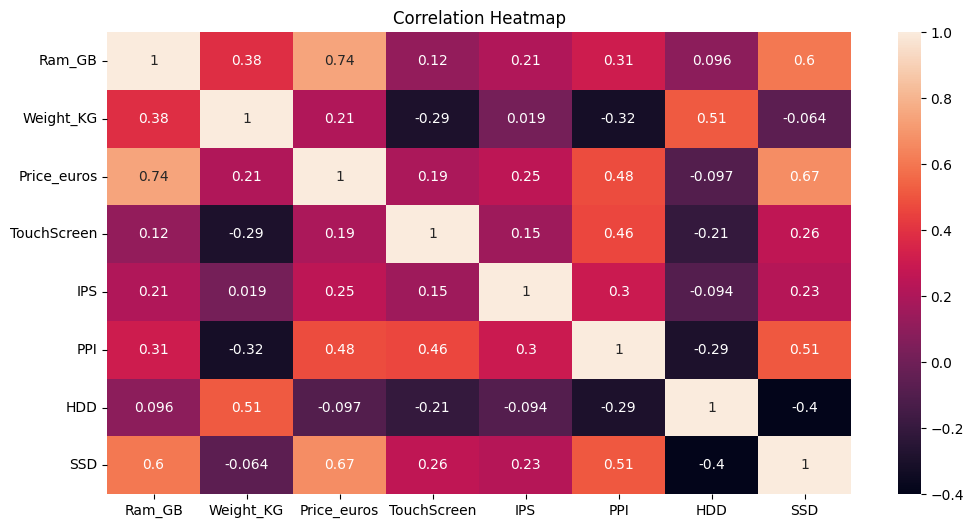

In [111]:
plt.figure(figsize = (12,6))
sns.heatmap(dfnum.corr(), annot = True)
plt.title('Correlation Heatmap')
plt.show()

In [112]:
# Getting my X and y

X = df.drop(['Price_euros'],axis=1)

y = np.log(df['Price_euros'])

In [113]:
X.head()

,Company,TypeName,Ram_GB,OpSys,Weight_KG,TouchScreen,IPS,PPI,Cpu_name,HDD,SSD,Gpu_brand
0,Apple,Ultrabook,8,MaC,1.37,0,1,226.992481,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,MaC,1.34,0,0,127.669173,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Others,1.86,0,0,141.217949,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,MaC,1.83,0,1,220.519481,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,MaC,1.37,0,1,226.992481,Intel Core i5,0,256,Intel


In [114]:
y.head()

,Price_euros
0,7.200194
1,6.801216
2,6.354370
3,7.838915
4,7.497540


In [115]:
# Saving dataframe as csv

X.to_csv('traintest.csv', index=False)

In [116]:
# Importing library for model building

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import tree

In [117]:
# Spliting dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1106, 12), (196, 12), (1106,), (196,))

In [118]:
mapper = {i:value for i,value in enumerate(X_train.columns)}

mapper

{0: 'Company',
 1: 'TypeName',
 2: 'Ram_GB',
 3: 'OpSys',
 4: 'Weight_KG',
 5: 'TouchScreen',
 6: 'IPS',
 7: 'PPI',
 8: 'Cpu_name',
 9: 'HDD',
 10: 'SSD',
 11: 'Gpu_brand'}

In [119]:
# columnTransformer will use to apply different trasformation to different columns

step1 = ColumnTransformer(transformers = [('col_tnf', OneHotEncoder(sparse_output = False, drop = 'first'),[0,1,3,8,11])],remainder = 'passthrough')

In [120]:
step2 = LinearRegression()

In [121]:
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

In [122]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 3, 8, 11])])),
                ('step2', LinearRegression())])

In [123]:
coefficients = pipe.named_steps['step2'].coef_
intercept = pipe.named_steps['step2'].intercept_

print('coefficients\n')
print(coefficients)
print('\n')
print('intercept\n')
print(intercept)

coefficients

[ 3.07044239e-01  1.08391539e-01 -3.25734233e-01  1.57800887e-01
 -2.05597991e-03  4.77848564e-01  1.88664443e-01  5.08057577e-02
  4.58680518e-01  1.05908468e-01  2.13758527e-01 -2.89265960e-01
  4.14394493e-01  2.60026925e-01  3.28367085e-01  3.11663372e-01
 -5.09370788e-01  3.65534878e-01 -1.40944948e-02 -2.04166654e-01
 -2.23107418e-01  2.69571022e-02  5.00558037e-01 -2.68981046e-01
 -3.80631938e-02  7.89146951e-02  3.89749471e-01  4.50304052e-01
 -1.75203681e-01  1.04728619e-01  9.46067892e-02  2.45454639e-02
  8.45816029e-02 -1.06161703e-01  3.94970916e-02  2.37946025e-03
  8.26267261e-06  6.23784408e-04]


intercept

5.656016528938852


In [124]:
y_pred_LR = pipe.predict(X_test)
y_pred_LR

array([6.73995697, 5.71233467, 6.08215907, 6.3886321 , 6.95520093,
       7.42932259, 6.28334069, 6.43364678, 7.16910102, 5.61653262,
       6.95116007, 7.05635187, 7.76322801, 6.91325292, 8.00184611,
       6.8600843 , 6.82209117, 5.62670867, 7.41147649, 7.51143965,
       7.69573076, 7.13293284, 6.84386414, 7.30967163, 6.52985406,
       7.79698669, 7.07352198, 6.15219287, 6.91631631, 6.64733872,
       7.11536536, 6.04723074, 6.61236793, 7.08096101, 7.13458068,
       6.81189073, 6.95879587, 6.98100906, 7.23797964, 7.45458039,
       7.71332488, 7.29154081, 5.77710651, 6.0242735 , 6.22395211,
       6.03488453, 7.03124121, 7.9488529 , 7.55048895, 6.8652697 ,
       7.54592851, 7.50789952, 5.77523693, 5.55097061, 6.76299228,
       6.80795999, 6.09242144, 7.08896744, 6.23279742, 6.49844655,
       7.02380118, 7.12612253, 5.90511632, 6.49970388, 6.80849634,
       6.57663716, 6.05659937, 7.48469014, 6.77039895, 5.94738386,
       6.99893067, 6.77216167, 6.64511266, 6.4740318 , 6.65022

In [125]:
y_test

,Price_euros
248,6.514713
555,5.411646
1251,5.988961
547,6.136322
885,7.494986
...,...
1129,7.029088
172,5.733341
322,6.997596
996,7.207119


In [126]:
print(pipe.get_params)

<bound method Pipeline.get_params of Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 3, 8, 11])])),
                ('step2', LinearRegression())])>


In [127]:
print("MSE = ", metrics.mean_squared_error(y_test,y_pred_LR))

print('MAE = ', metrics.mean_absolute_error(y_test, y_pred_LR))

print('R2 score = ', metrics.r2_score(y_test,y_pred_LR))

MSE =  0.07370782180866566
MAE =  0.21017986543194037
R2 score =  0.8073255624974497


In [128]:
# Calculate R-squared scores
train_r2 = metrics.r2_score(y_train, pipe.predict(X_train))
test_r2 = metrics.r2_score(y_test, y_pred_LR)

# Print the results
print(f'Training R-squared: {train_r2}')
print(f'Test R-squared: {test_r2}')

Training R-squared: 0.8339738735512752
Test R-squared: 0.8073255624974497


- Avobe results indicates overfitting

In [129]:
# Ridge Regression

# columnTransformer will will use to apply different trasformation to different columns

step1 = ColumnTransformer(transformers = [('col_tnf', OneHotEncoder(sparse_output = False, drop = 'first'),
                                           [0,1,3,8,11])],remainder = 'passthrough')

step2 = Ridge(alpha = 10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)



Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 3, 8, 11])])),
                ('step2', Ridge(alpha=10))])

In [130]:
coefficients = pipe.named_steps['step2'].coef_
intercept = pipe.named_steps['step2'].intercept_

print('Coefficient:\n')
print(coefficients)
print('\n')
print('Intercepts:\n')
print(intercept)

Coefficient:

[ 1.69733745e-01  1.98210582e-02 -8.37202171e-02  7.47256926e-02
 -1.40168506e-02  6.96048351e-02  1.11330330e-01 -7.78921388e-03
  7.66410317e-02  2.51623450e-02  1.03149102e-01 -1.22453287e-01
  7.84201936e-02  5.19229390e-02  8.03133689e-02  1.92211716e-01
 -1.56455173e-01  5.48782376e-02 -1.54777357e-03 -1.27951836e-01
 -2.10912298e-01  7.63613000e-02  3.52842436e-01 -1.84524416e-01
  1.47906710e-02  1.21754345e-03  3.09373040e-01  3.61942490e-01
 -2.66685810e-01  9.81274656e-02  1.11153726e-01  2.67976464e-02
  7.82061121e-02 -7.20840779e-02  3.06536736e-02  2.36437820e-03
  9.44074783e-06  6.51096074e-04]


Intercepts:

5.732313969455914


In [131]:
y_pred_ridge = pipe.predict(X_test)
y_pred_ridge

array([6.70574839, 5.69396191, 6.14239576, 6.38820723, 6.95945987,
       7.46268575, 6.25590498, 6.48079724, 7.13491049, 5.68668183,
       6.96158834, 7.06132826, 7.60188185, 6.91189412, 7.86471114,
       6.88744743, 6.80543585, 5.69547924, 7.40134951, 7.52462349,
       7.608144  , 7.18180584, 6.82588116, 7.34724214, 6.52837486,
       7.81197548, 7.11171856, 6.15758902, 6.89979013, 6.62361046,
       7.08934348, 6.09855569, 6.72044316, 7.07420443, 7.11885984,
       6.79487259, 6.95538088, 6.96316828, 7.23742474, 7.43892476,
       7.55574025, 7.30917784, 5.77010251, 5.9863784 , 6.273756  ,
       6.04242568, 7.10720699, 7.76429215, 7.37988317, 6.85100884,
       7.52338735, 7.49050448, 5.86214391, 5.61794194, 6.73789452,
       6.79000938, 6.14316752, 7.11829669, 6.19483698, 6.49108852,
       7.1219062 , 7.11103924, 5.92004768, 6.49031586, 6.79135566,
       6.54989627, 6.0614677 , 7.47322627, 6.7579197 , 5.89799737,
       6.99827831, 6.74662243, 6.65586093, 6.44566455, 6.70722

In [132]:
print("MSE = ", metrics.mean_squared_error(y_test,y_pred_ridge))

print('MAE = ', metrics.mean_absolute_error(y_test, y_pred_ridge))

print('R2 score = ', metrics.r2_score(y_test,y_pred_ridge))

MSE =  0.07164005649770154
MAE =  0.20926927121196615
R2 score =  0.8127307624938829


In [133]:
# Calculate R-squared scores
train_r2 = metrics.r2_score(y_train, pipe.predict(X_train))
test_r2 = metrics.r2_score(y_test, y_pred_ridge)

# Print the results
print(f'Training R-squared: {train_r2}')
print(f'Test R-squared: {test_r2}')

Training R-squared: 0.8243896600540359
Test R-squared: 0.8127307624938829


In [134]:
# Lasso Regression

# columnTransformer will will use to apply different trasformation to different columns

step1 = ColumnTransformer(transformers = [('col_tnf',
                                           OneHotEncoder(sparse_output = False, drop = 'first'),
                                           [0,1,3,8,11])],
                                              remainder = 'passthrough')

step2 = Lasso(alpha = 0.0001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)



Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 3, 8, 11])])),
                ('step2', Lasso(alpha=0.0001))])

In [135]:
coefficients = pipe.named_steps['step2'].coef_
intercept = pipe.named_steps['step2'].intercept_

print('Coefficient:\n')
print(coefficients)
print('\n')
print('Intercepts:\n')
print(intercept)

Coefficient:

[ 3.24008743e-01  9.27491206e-02 -2.95997332e-01  1.41179186e-01
 -0.00000000e+00  4.09805496e-01  1.73998472e-01  0.00000000e+00
  3.96791742e-01  9.13622877e-02  1.93638099e-01 -2.78407235e-01
  3.58926302e-01  2.19557010e-01  2.90336444e-01  2.93615703e-01
 -4.90373526e-01  3.11143871e-01 -0.00000000e+00 -1.89598076e-01
 -2.13495955e-01  3.88826686e-02  5.07784799e-01 -2.27562116e-01
  0.00000000e+00  7.66615024e-02  3.89574592e-01  4.50104809e-01
 -1.79880100e-01  1.01583041e-01  9.17665776e-02  2.47275783e-02
  8.17876197e-02 -9.62199518e-02  3.77977288e-02  2.36570549e-03
  8.75013808e-06  6.27919521e-04]


Intercepts:

5.630356562390023


In [136]:
y_pred_lasso = pipe.predict(X_test)
y_pred_lasso

array([6.7368167 , 5.70824326, 6.08390152, 6.38940233, 6.9554919 ,
       7.43193624, 6.27951506, 6.445226  , 7.16682335, 5.62804796,
       6.95205817, 7.05429797, 7.75848925, 6.91113332, 8.00088818,
       6.86406999, 6.82152628, 5.63752331, 7.41230262, 7.51539486,
       7.69056515, 7.13903171, 6.8400209 , 7.31088805, 6.53051827,
       7.79650077, 7.07501658, 6.15066096, 6.9141578 , 6.64442168,
       7.11386133, 6.0484465 , 6.62828703, 7.07611593, 7.13506031,
       6.80847562, 6.95613452, 6.9798312 , 7.23820226, 7.45308281,
       7.71023456, 7.29521866, 5.77467629, 6.01815829, 6.23313597,
       6.03458395, 7.04661261, 7.94395031, 7.54422917, 6.86515878,
       7.54141343, 7.50554052, 5.78679418, 5.56264982, 6.76234666,
       6.80874745, 6.09157923, 7.0925806 , 6.22698345, 6.49293095,
       7.04021807, 7.12688155, 5.90439175, 6.49474187, 6.80955223,
       6.57505915, 6.05575418, 7.4827953 , 6.76765454, 5.94018044,
       6.99701894, 6.76814528, 6.6482561 , 6.47255399, 6.65339

In [137]:
print("MSE = ", metrics.mean_squared_error(y_test,y_pred_lasso))

print('MAE = ', metrics.mean_absolute_error(y_test, y_pred_lasso))

print('R2 score = ', metrics.r2_score(y_test,y_pred_lasso))

MSE =  0.07333907159439433
MAE =  0.20991914616513468
R2 score =  0.8082894865203044


In [138]:
# Calculate R-squared scores
train_r2 = metrics.r2_score(y_train, pipe.predict(X_train))
test_r2 = metrics.r2_score(y_test, y_pred_lasso)

# Print the results
print(f'Training R-squared: {train_r2}')
print(f'Test R-squared: {test_r2}')

Training R-squared: 0.8338295502344776
Test R-squared: 0.8082894865203044


In [139]:
# Decision Tree Regression

# columnTransformer will will use to apply different trasformation to different columns

step1 = ColumnTransformer(transformers = [('col_tnf',
                                           OneHotEncoder(sparse_output = False, drop = 'first'),
                                           [0,1,3,8,11])],
                                              remainder = 'passthrough')

step2 = DecisionTreeRegressor(max_depth=9,splitter='random')

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 3, 8, 11])])),
                ('step2',
                 DecisionTreeRegressor(max_depth=9, splitter='random'))])

In [140]:
y_pred_DT = pipe.predict(X_test)

print('R2_sore: ', metrics.r2_score(y_test,y_pred_DT))
print('MAE: ', metrics.mean_absolute_error(y_test,y_pred_DT))
print('MSE: ',metrics.mean_squared_error(y_test,y_pred_DT))

R2_sore:  0.7877429487304191
MAE:  0.21324798645801574
MSE:  0.08119917263235295


In [141]:
# Calculate R-squared scores
train_r2 = metrics.r2_score(y_train, pipe.predict(X_train))
test_r2 = metrics.r2_score(y_test, y_pred_DT)

# Print the results
print(f'Training R-squared: {train_r2}')
print(f'Test R-squared: {test_r2}')

Training R-squared: 0.9161776318199706
Test R-squared: 0.7877429487304191


- Its a clear case of overfitting

In [142]:
# Random Forest Regression

# columnTransformer will will use to apply different trasformation to different columns

step1 = ColumnTransformer(transformers = [('col_tnf',
                                           OneHotEncoder(sparse_output = False, drop = 'first'),
                                           [0,1,3,8,11])],
                                              remainder = 'passthrough')

step2 = RandomForestRegressor(n_estimators=100,random_state=3,max_depth=15,max_samples=0.5,max_features=0.75)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train, y_train)

y_pred_RF = pipe.predict(X_test)

print('R2_sore: ', metrics.r2_score(y_test,y_pred_RF))
print('MAE: ', metrics.mean_absolute_error(y_test,y_pred_RF))
print('MSE: ',metrics.mean_squared_error(y_test,y_pred_RF))

# Calculate R-squared scores
train_r2 = metrics.r2_score(y_train, pipe.predict(X_train))
test_r2 = metrics.r2_score(y_test, y_pred_RF)

# Print the results
print(f'Training R-squared: {train_r2}')
print(f'Test R-squared: {test_r2}')

R2_sore:  0.8848024216171648
MAE:  0.16024231797483873
MSE:  0.044068962599771035
Training R-squared: 0.9521322934303903
Test R-squared: 0.8848024216171648


- Random Forest Tree has given so far better result so will do some hyperparameter tunning and try to improve the performance of the model.

In [143]:
# Hyperparameter Tunning for Random Forest Regressor

X.head()

,Company,TypeName,Ram_GB,OpSys,Weight_KG,TouchScreen,IPS,PPI,Cpu_name,HDD,SSD,Gpu_brand
0,Apple,Ultrabook,8,MaC,1.37,0,1,226.992481,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,MaC,1.34,0,0,127.669173,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Others,1.86,0,0,141.217949,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,MaC,1.83,0,1,220.519481,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,MaC,1.37,0,1,226.992481,Intel Core i5,0,256,Intel


In [144]:
X.shape

(1302, 12)

In [145]:
X_new = X.copy()

In [159]:
X_new = pd.get_dummies(X_new, drop_first = True)

In [160]:
X_new

,Ram_GB,Weight_KG,TouchScreen,IPS,PPI,HDD,SSD,Company_Apple,Company_Asus,Company_Chuwi,...,TypeName_Ultrabook,TypeName_Workstation,OpSys_Others,OpSys_Windows,Cpu_name_Intel Core i3,Cpu_name_Intel Core i5,Cpu_name_Intel Core i7,Cpu_name_Other Intel Processor,Gpu_brand_Intel,Gpu_brand_Nvidia
0,8,1.37,0,1,226.992481,0,128,True,False,False,...,True,False,False,False,False,True,False,False,True,False
1,8,1.34,0,0,127.669173,0,0,True,False,False,...,True,False,False,False,False,True,False,False,True,False
2,8,1.86,0,0,141.217949,0,256,False,False,False,...,False,False,True,False,False,True,False,False,True,False
3,16,1.83,0,1,220.519481,0,512,True,False,False,...,True,False,False,False,False,False,True,False,False,False
4,8,1.37,0,1,226.992481,0,256,True,False,False,...,True,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,4,1.80,1,1,157.357143,0,128,False,False,False,...,False,False,False,True,False,False,True,False,True,False
1299,16,1.30,1,1,276.090226,0,512,False,False,False,...,False,False,False,True,False,False,True,False,True,False
1300,2,1.50,0,0,111.928571,0,0,False,False,False,...,False,False,False,True,False,False,False,True,True,False
1301,6,2.19,0,0,100.448718,1000,0,False,False,False,...,False,False,False,True,False,False,True,False,False,False


In [161]:
X_new.columns

Index(['Ram_GB', 'Weight_KG', 'TouchScreen', 'IPS', 'PPI', 'HDD', 'SSD',
       'Company_Apple', 'Company_Asus', 'Company_Chuwi', 'Company_Dell',
       'Company_Fujitsu', 'Company_Google', 'Company_HP', 'Company_Huawei',
       'Company_LG', 'Company_Lenovo', 'Company_MSI', 'Company_Mediacom',
       'Company_Microsoft', 'Company_Razer', 'Company_Samsung',
       'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi', 'TypeName_Gaming',
       'TypeName_Netbook', 'TypeName_Notebook', 'TypeName_Ultrabook',
       'TypeName_Workstation', 'OpSys_Others', 'OpSys_Windows',
       'Cpu_name_Intel Core i3', 'Cpu_name_Intel Core i5',
       'Cpu_name_Intel Core i7', 'Cpu_name_Other Intel Processor',
       'Gpu_brand_Intel', 'Gpu_brand_Nvidia'],
      dtype='object')

In [162]:
indexList = [0,1,3,8,11]
tranformList = []

for k,v in mapper.items():
    if k in indexList:
        tranformList.append(v)

tranformList

['Company', 'TypeName', 'OpSys', 'Cpu_name', 'Gpu_brand']

In [163]:
train_new = pd.get_dummies(X.copy(), columns = tranformList, drop_first = True)
train_new.head()

,Ram_GB,Weight_KG,TouchScreen,IPS,PPI,HDD,SSD,Company_Apple,Company_Asus,Company_Chuwi,...,TypeName_Ultrabook,TypeName_Workstation,OpSys_Others,OpSys_Windows,Cpu_name_Intel Core i3,Cpu_name_Intel Core i5,Cpu_name_Intel Core i7,Cpu_name_Other Intel Processor,Gpu_brand_Intel,Gpu_brand_Nvidia
0,8,1.37,0,1,226.992481,0,128,True,False,False,...,True,False,False,False,False,True,False,False,True,False
1,8,1.34,0,0,127.669173,0,0,True,False,False,...,True,False,False,False,False,True,False,False,True,False
2,8,1.86,0,0,141.217949,0,256,False,False,False,...,False,False,True,False,False,True,False,False,True,False
3,16,1.83,0,1,220.519481,0,512,True,False,False,...,True,False,False,False,False,False,True,False,False,False
4,8,1.37,0,1,226.992481,0,256,True,False,False,...,True,False,False,False,False,True,False,False,True,False


In [164]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Ram_GB                          1302 non-null   int32  
 1   Weight_KG                       1302 non-null   float32
 2   TouchScreen                     1302 non-null   int64  
 3   IPS                             1302 non-null   int64  
 4   PPI                             1302 non-null   float64
 5   HDD                             1302 non-null   int64  
 6   SSD                             1302 non-null   int64  
 7   Company_Apple                   1302 non-null   bool   
 8   Company_Asus                    1302 non-null   bool   
 9   Company_Chuwi                   1302 non-null   bool   
 10  Company_Dell                    1302 non-null   bool   
 11  Company_Fujitsu                 1302 non-null   bool   
 12  Company_Google                  1302 no

In [165]:
# Converting all bool to numerical

train_new['Company_Apple'] = train_new['Company_Apple'].replace({True: 1, False: 0})
train_new['Company_Asus'] = train_new['Company_Asus'].replace({True: 1, False: 0})
train_new['Company_Chuwi'] = train_new['Company_Chuwi'].replace({True: 1, False: 0})
train_new['Company_Dell'] = train_new['Company_Dell'].replace({True: 1, False: 0})
train_new['Company_Fujitsu'] = train_new['Company_Fujitsu'].replace({True: 1, False: 0})
train_new['Company_Google'] = train_new['Company_Google'].replace({True: 1, False: 0})
train_new['Company_HP'] = train_new['Company_HP'].replace({True: 1, False: 0})
train_new['Company_Huawei'] = train_new['Company_Huawei'].replace({True: 1, False: 0})
train_new['Company_LG'] = train_new['Company_LG'].replace({True: 1, False: 0})
train_new['Company_Lenovo'] = train_new['Company_Lenovo'].replace({True: 1, False: 0})
train_new['Company_MSI'] = train_new['Company_MSI'].replace({True: 1, False: 0})
train_new['Company_Mediacom'] = train_new['Company_Mediacom'].replace({True: 1, False: 0})
train_new['Company_Microsoft'] = train_new['Company_Microsoft'].replace({True: 1, False: 0})
train_new['Company_Razer'] = train_new['Company_Razer'].replace({True: 1, False: 0})
train_new['Company_Samsung'] = train_new['Company_Samsung'].replace({True: 1, False: 0})
train_new['Company_Toshiba'] = train_new['Company_Toshiba'].replace({True: 1, False: 0})
train_new['Company_Vero'] = train_new['Company_Vero'].replace({True: 1, False: 0})
train_new['Company_Xiaomi'] = train_new['Company_Xiaomi'].replace({True: 1, False: 0})
train_new['TypeName_Gaming'] = train_new['TypeName_Gaming'].replace({True: 1, False: 0})
train_new['TypeName_Netbook'] = train_new['TypeName_Netbook'].replace({True: 1, False: 0})
train_new['TypeName_Notebook'] = train_new['TypeName_Notebook'].replace({True: 1, False: 0})
train_new['TypeName_Ultrabook'] = train_new['TypeName_Ultrabook'].replace({True: 1, False: 0})
train_new['TypeName_Workstation'] = train_new['TypeName_Workstation'].replace({True: 1, False: 0})
train_new['OpSys_Others'] = train_new['OpSys_Others'].replace({True: 1, False: 0})
train_new['OpSys_Windows'] = train_new['OpSys_Windows'].replace({True: 1, False: 0})
train_new['Cpu_name_Intel Core i3'] = train_new['Cpu_name_Intel Core i3'].replace({True: 1, False: 0})
train_new['Cpu_name_Intel Core i5'] = train_new['Cpu_name_Intel Core i5'].replace({True: 1, False: 0})
train_new['Cpu_name_Intel Core i7'] = train_new['Cpu_name_Intel Core i7'].replace({True: 1, False: 0})
train_new['Cpu_name_Other Intel Processor'] = train_new['Cpu_name_Other Intel Processor'].replace({True: 1, False: 0})
train_new['Gpu_brand_Nvidia'] = train_new['Gpu_brand_Nvidia'].replace({True: 1, False: 0})
train_new['Gpu_brand_Intel'] = train_new['Gpu_brand_Intel'].replace({True: 1, False: 0})

In [166]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Ram_GB                          1302 non-null   int32  
 1   Weight_KG                       1302 non-null   float32
 2   TouchScreen                     1302 non-null   int64  
 3   IPS                             1302 non-null   int64  
 4   PPI                             1302 non-null   float64
 5   HDD                             1302 non-null   int64  
 6   SSD                             1302 non-null   int64  
 7   Company_Apple                   1302 non-null   int64  
 8   Company_Asus                    1302 non-null   int64  
 9   Company_Chuwi                   1302 non-null   int64  
 10  Company_Dell                    1302 non-null   int64  
 11  Company_Fujitsu                 1302 non-null   int64  
 12  Company_Google                  1302 no

In [167]:
X_train_new,X_test_new, y_train, y_test = train_test_split(X_new, y, test_size = 0.15, random_state = 2)

X_train_new.shape, X_test_new.shape, y_train.shape, y_test.shape

((1106, 38), (196, 38), (1106,), (196,))

[Text(0.48811201891965883, 0.9782608695652174, 'Ram_GB <= 7.0\nsquared_error = 0.39\nsamples = 1106\nvalue = 6.846'),
 Text(0.2178686502372735, 0.9347826086956522, 'Cpu_name_Other Intel Processor <= 0.5\nsquared_error = 0.192\nsamples = 362\nvalue = 6.234'),
 Text(0.1450868412756355, 0.8913043478260869, 'Cpu_name_Intel Core i5 <= 0.5\nsquared_error = 0.13\nsamples = 256\nvalue = 6.411'),
 Text(0.09647221576956262, 0.8478260869565217, 'Cpu_name_Intel Core i7 <= 0.5\nsquared_error = 0.08\nsamples = 154\nvalue = 6.257'),
 Text(0.03936375854516493, 0.8043478260869565, 'Weight_KG <= 1.645\nsquared_error = 0.07\nsamples = 135\nvalue = 6.208'),
 Text(0.0074334638614189956, 0.7608695652173914, 'TypeName_Ultrabook <= 0.5\nsquared_error = 0.064\nsamples = 10\nvalue = 6.611'),
 Text(0.005309617043870711, 0.717391304347826, 'Weight_KG <= 1.395\nsquared_error = 0.02\nsamples = 8\nvalue = 6.502'),
 Text(0.0042476936350965685, 0.6739130434782609, 'squared_error = 0.0\nsamples = 1\nvalue = 6.232'),
 T

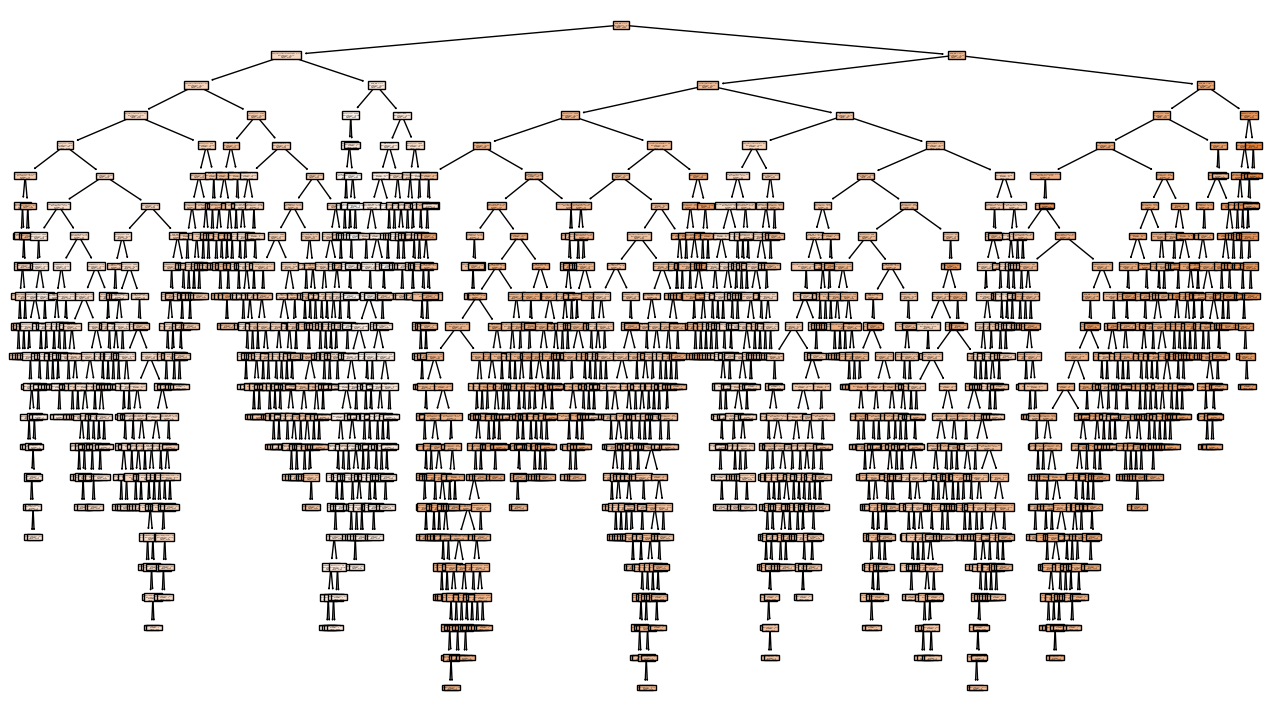

In [168]:
DTReg  = DecisionTreeRegressor(random_state=0)
DTReg.fit(X_train_new,y_train)

plt.figure(figsize=(16,9))
tree.plot_tree(DTReg,filled=True,feature_names=X_train_new.columns)

In [169]:
y_pred_DT2 = DTReg.predict(X_test_new)
y_pred_DT2

array([6.58755001, 5.80283554, 5.69373214, 6.14632926, 7.43838353,
       7.40792432, 6.02803753, 6.96129605, 7.14435199, 5.69709349,
       7.00215595, 6.70808408, 7.46064564, 6.75576892, 7.08924316,
       7.07434541, 7.08924316, 5.79073552, 7.56475701, 7.62554629,
       7.62070509, 7.3125535 , 6.63856779, 7.15461536, 6.2126061 ,
       7.64921632, 7.40792432, 6.15060277, 6.91821043, 6.69703425,
       7.5822241 , 5.29330482, 6.88653164, 6.99759598, 7.01557358,
       6.80128303, 7.50659178, 7.33628566, 7.58578882, 7.34245848,
       7.46064564, 7.03438793, 5.70044357, 5.82600011, 6.10702289,
       6.10924758, 6.72022016, 7.70930833, 7.47477218, 7.28961052,
       7.78280726, 7.50604218, 5.93753621, 5.433722  , 6.39359075,
       7.11441166, 6.19236249, 7.08924316, 5.95064255, 6.74405919,
       7.40376987, 7.01557358, 5.50125821, 7.04664728, 6.95559261,
       7.08924316, 6.02102335, 7.43248381, 6.8554088 , 5.82600011,
       6.82762923, 6.51471269, 6.61875233, 6.37161185, 7.43543

In [170]:
print('R2_score: ', metrics.r2_score(y_test,y_pred_DT2))
print('MAE: ', metrics.mean_absolute_error(y_test,y_pred_DT2))
print('MSE: ',metrics.mean_squared_error(y_test,y_pred_DT2))

# Calculate R-squared scores
train_r2 = metrics.r2_score(y_train, DTReg.predict(X_train_new))
test_r2 = metrics.r2_score(y_test, y_pred_DT2)

# Print the results
print(f'Training R-squared: {train_r2}')
print(f'Test R-squared: {test_r2}')

R2_score:  0.8091050519375838
MAE:  0.1984279578203809
MSE:  0.0730270761308065
Training R-squared: 0.9961583612673353
Test R-squared: 0.8091050519375838


- Overfitting case
- So will be doing post-prunning

Decision trees have the potential to become overly complex and capture noise in the training data, leading to overfitting. Pruning is a technique used to prevent overfitting by removing parts of the tree that do not contribute significantly to improving the model's performance on unseen data.

Cost-complexity pruning is a specific pruning technique that involves adding a penalty term for the complexity of the tree during the pruning process. The cost-complexity parameter (usually denoted by alpha) controls the trade-off between simplicity and accuracy. A smaller alpha value results in a more complex tree, while a larger alpha value leads to a simpler tree.

The pruning path refers to the sequence of subtrees obtained by iteratively applying cost-complexity pruning. As you increase the alpha parameter, nodes with the least contribution to the model's performance are pruned, leading to a simpler tree.

The cost-complexity pruning path is the sequence of subtrees generated at different values of the cost-complexity parameter (alpha). By examining this path, you can observe how the complexity of the tree changes as you adjust the alpha parameter.

In [171]:
path = DTReg.cost_complexity_pruning_path(X_train_new,y_train)
ccp_alphas = path.ccp_alphas

In [172]:
ccp_alphas

array([0.00000000e+00, 2.56977481e-17, 2.01384900e-12, 1.25921536e-11,
       1.39658331e-11, 1.81593908e-11, 1.08578035e-10, 1.90413356e-10,
       3.52052738e-10, 4.91049146e-10, 5.34151157e-10, 1.67264385e-09,
       1.75885874e-09, 2.06848314e-09, 2.62165042e-09, 3.72228741e-09,
       3.85508881e-09, 4.84153453e-09, 5.07372610e-09, 5.49805278e-09,
       6.03670399e-09, 6.72374014e-09, 6.97093999e-09, 8.29167813e-09,
       9.24814100e-09, 1.05268403e-08, 1.07749518e-08, 1.27531889e-08,
       1.59605995e-08, 1.65552061e-08, 1.68770720e-08, 1.83991883e-08,
       2.02572985e-08, 2.02949504e-08, 2.39815717e-08, 2.41668325e-08,
       2.62926181e-08, 3.02610142e-08, 3.03537206e-08, 3.32670950e-08,
       3.36607143e-08, 3.58476842e-08, 3.60721856e-08, 3.90442722e-08,
       4.00282623e-08, 4.60335999e-08, 4.74879668e-08, 4.86785873e-08,
       4.86910357e-08, 5.08932644e-08, 5.11643383e-08, 5.23330908e-08,
       5.37271012e-08, 5.42630695e-08, 5.53730905e-08, 5.56520158e-08,
      

In [173]:
alphaList=[]

for alpha in ccp_alphas:
    reg = DecisionTreeRegressor(ccp_alpha=alpha, random_state=0)
    reg.fit(X_train_new,y_train)
    alphaList.append(reg)

In [174]:
alphaList

[DecisionTreeRegressor(random_state=0),
 DecisionTreeRegressor(ccp_alpha=2.5697748128755883e-17, random_state=0),
 DecisionTreeRegressor(ccp_alpha=2.0138490031691803e-12, random_state=0),
 DecisionTreeRegressor(ccp_alpha=1.2592153560571671e-11, random_state=0),
 DecisionTreeRegressor(ccp_alpha=1.3965833111231348e-11, random_state=0),
 DecisionTreeRegressor(ccp_alpha=1.8159390808429732e-11, random_state=0),
 DecisionTreeRegressor(ccp_alpha=1.0857803545150091e-10, random_state=0),
 DecisionTreeRegressor(ccp_alpha=1.90413355968792e-10, random_state=0),
 DecisionTreeRegressor(ccp_alpha=3.520527377757975e-10, random_state=0),
 DecisionTreeRegressor(ccp_alpha=4.910491462918104e-10, random_state=0),
 DecisionTreeRegressor(ccp_alpha=5.341511569002326e-10, random_state=0),
 DecisionTreeRegressor(ccp_alpha=1.6726438502289894e-09, random_state=0),
 DecisionTreeRegressor(ccp_alpha=1.7588587415932922e-09, random_state=0),
 DecisionTreeRegressor(ccp_alpha=2.0684831416523e-09, random_state=0),
 Decis

In [175]:
train_score = [reg.score(X_train_new, y_train)for reg in alphaList]
test_score = [reg.score(X_test_new,y_test) for reg in alphaList]

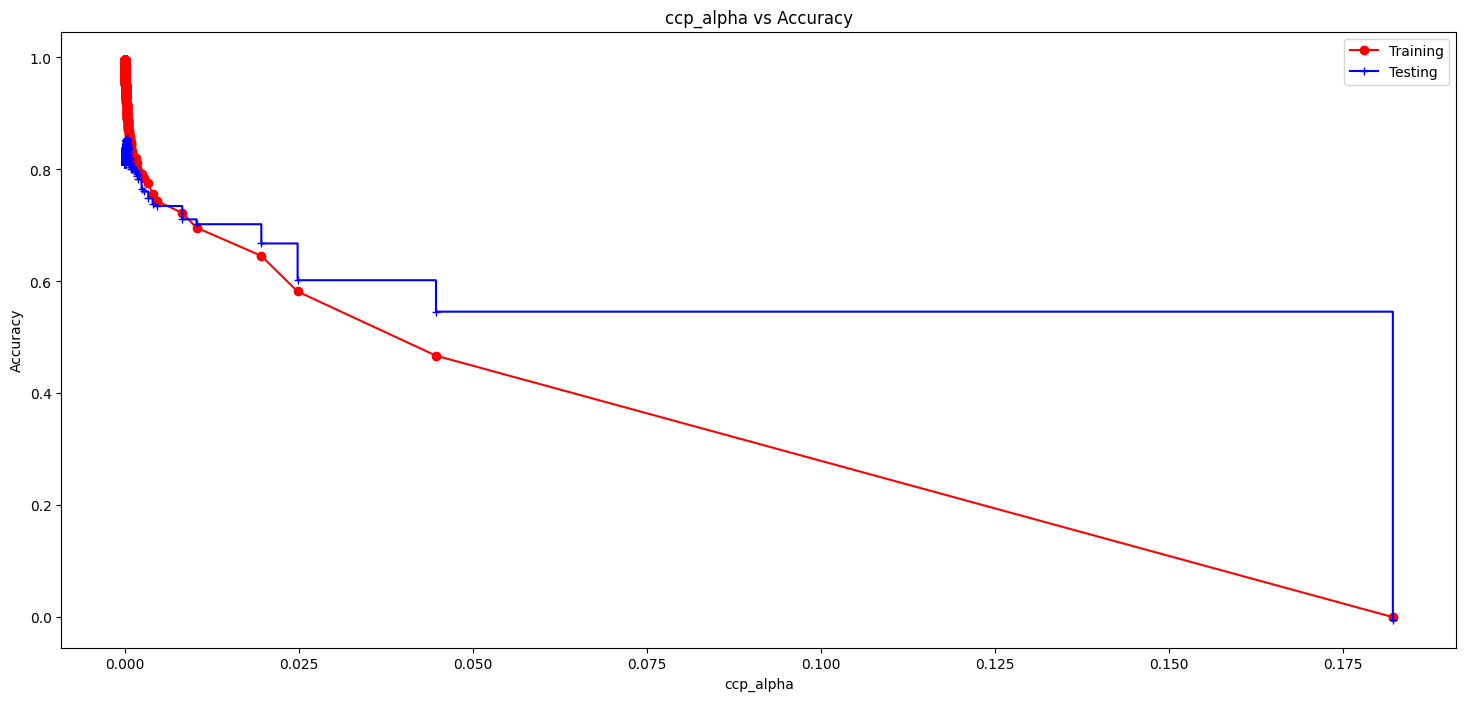

In [176]:
plt.figure(figsize = (18,8))
plt.title('ccp_alpha vs Accuracy')
plt.plot(ccp_alphas, train_score, marker = 'o',label = 'Training', color = 'red')
plt.plot(ccp_alphas, test_score, marker = '+',label = 'Testing', color = 'blue', drawstyle = 'steps-post')
plt.xlabel('ccp_alpha')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

- Possible values of ccp-alphas can lie between 0.0025 to 0.0075

[Text(0.5, 0.9, 'Ram_GB <= 7.0\nsquared_error = 0.39\nsamples = 1106\nvalue = 6.846'),
 Text(0.25, 0.7, 'Cpu_name_Other Intel Processor <= 0.5\nsquared_error = 0.192\nsamples = 362\nvalue = 6.234'),
 Text(0.125, 0.5, 'squared_error = 0.13\nsamples = 256\nvalue = 6.411'),
 Text(0.375, 0.5, 'squared_error = 0.084\nsamples = 106\nvalue = 5.806'),
 Text(0.75, 0.7, 'Ram_GB <= 14.0\nsquared_error = 0.215\nsamples = 744\nvalue = 7.143'),
 Text(0.625, 0.5, 'TypeName_Notebook <= 0.5\nsquared_error = 0.159\nsamples = 553\nvalue = 6.992'),
 Text(0.5, 0.3, 'squared_error = 0.107\nsamples = 268\nvalue = 7.196'),
 Text(0.75, 0.3, 'PPI <= 114.874\nsquared_error = 0.131\nsamples = 285\nvalue = 6.8'),
 Text(0.625, 0.1, 'squared_error = 0.072\nsamples = 59\nvalue = 6.408'),
 Text(0.875, 0.1, 'squared_error = 0.096\nsamples = 226\nvalue = 6.902'),
 Text(0.875, 0.5, 'squared_error = 0.12\nsamples = 191\nvalue = 7.582')]

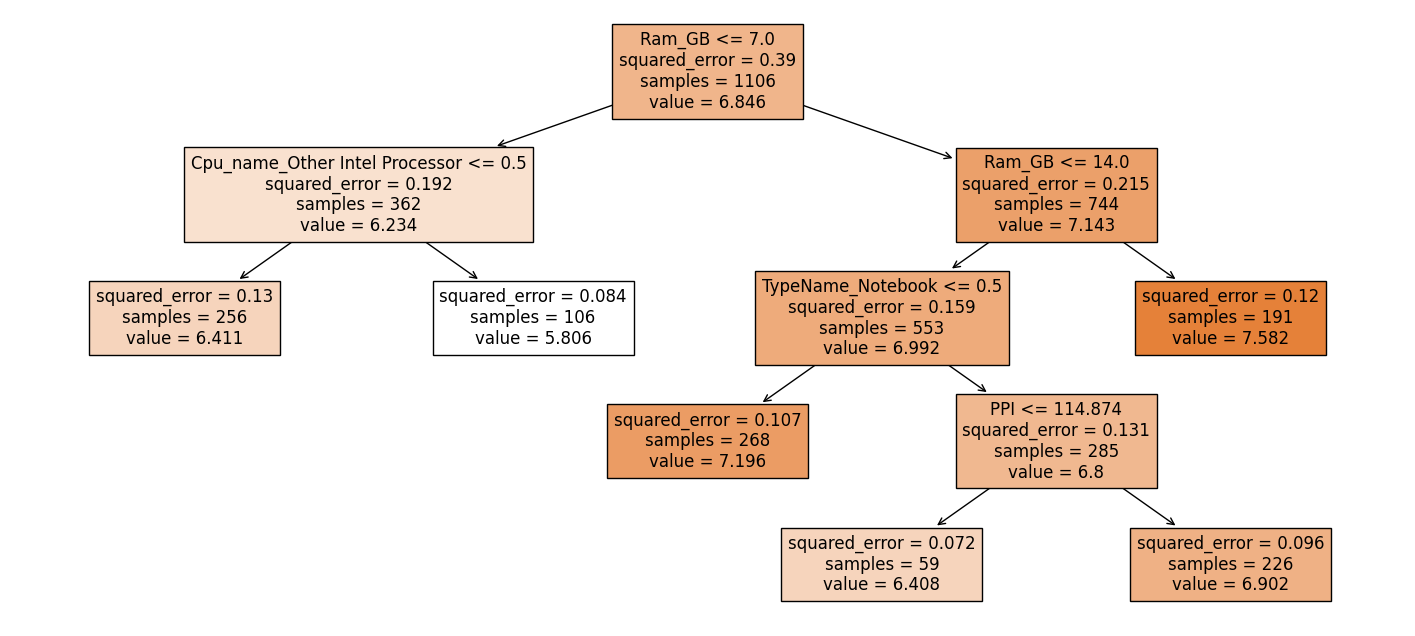

In [177]:
reg = DecisionTreeRegressor(ccp_alpha= 0.0085, random_state=0)
reg.fit(X_train_new, y_train)
plt.figure(figsize = (18,8))
tree.plot_tree(reg, filled=True, feature_names=train_new.columns)

In [178]:
# Hyperparameter tunning

param = {
    'RandomForest':{'model' : RandomForestRegressor(),
                   'param':{
                       'n_estimators':[int(x) for x in np.linspace(100,1200,10)],
                       'criterion':['squared_error', 'absolute_error'],
                       'max_depth':[int(x) for x in np.linspace(1,30,5)],
                       'max_features':['auto','sqrt', 'log2'],
                       'ccp_alpha' : [x for x in np.linspace(0.0025,0.0125,5)],
                       'min_samples_split':[2,5,10,14],
                       'min_samples_leaf':[2,5,10,14]
                   }
                },
    'DecisionTree':{'model':DecisionTreeRegressor(),
                    'param':{'criterion':["squared_error", "absolute_error"],
                       'max_depth':[int(x) for x in np.linspace(1,30,5)],
                       'max_features':['auto','sqrt', 'log2'],
                       'ccp_alpha' : [x for x in np.linspace(0.0025,0.0125,5)],
                       'min_samples_split':[2,5,10,14],
                       'min_samples_leaf':[2,5,10,14]
                        }
                   }
}

In [179]:
param

{'RandomForest': {'model': RandomForestRegressor(),
  'param': {'n_estimators': [100,
    222,
    344,
    466,
    588,
    711,
    833,
    955,
    1077,
    1200],
   'criterion': ['squared_error', 'absolute_error'],
   'max_depth': [1, 8, 15, 22, 30],
   'max_features': ['auto', 'sqrt', 'log2'],
   'ccp_alpha': [0.0025, 0.005, 0.0075, 0.01, 0.0125],
   'min_samples_split': [2, 5, 10, 14],
   'min_samples_leaf': [2, 5, 10, 14]}},
 'DecisionTree': {'model': DecisionTreeRegressor(),
  'param': {'criterion': ['squared_error', 'absolute_error'],
   'max_depth': [1, 8, 15, 22, 30],
   'max_features': ['auto', 'sqrt', 'log2'],
   'ccp_alpha': [0.0025, 0.005, 0.0075, 0.01, 0.0125],
   'min_samples_split': [2, 5, 10, 14],
   'min_samples_leaf': [2, 5, 10, 14]}}}

In [180]:
type(param)

dict

In [182]:
for modelname,mp in param.items():
    print(mp['model'])
    print(mp['param'])

RandomForestRegressor()
{'n_estimators': [100, 222, 344, 466, 588, 711, 833, 955, 1077, 1200], 'criterion': ['squared_error', 'absolute_error'], 'max_depth': [1, 8, 15, 22, 30], 'max_features': ['auto', 'sqrt', 'log2'], 'ccp_alpha': [0.0025, 0.005, 0.0075, 0.01, 0.0125], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [2, 5, 10, 14]}
DecisionTreeRegressor()
{'criterion': ['squared_error', 'absolute_error'], 'max_depth': [1, 8, 15, 22, 30], 'max_features': ['auto', 'sqrt', 'log2'], 'ccp_alpha': [0.0025, 0.005, 0.0075, 0.01, 0.0125], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [2, 5, 10, 14]}


In [183]:
score = []
for modelname,mp in param.items():
    clf = RandomizedSearchCV(estimator = mp['model'],
                             param_distributions = mp['param'],
                             cv = 5,
                             n_iter = 10,
                             scoring = 'neg_mean_squared_error',
                             verbose = 2)

    clf.fit(X_train_new,y_train)

    score.append({
        'model_name':modelname,
        'best_score':clf.best_score_,
        'best_estimator':clf.best_estimator_
    })


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ccp_alpha=0.005, criterion=squared_error, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=14, n_estimators=466; total time=   1.1s
[CV] END ccp_alpha=0.005, criterion=squared_error, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=14, n_estimators=466; total time=   0.8s
[CV] END ccp_alpha=0.005, criterion=squared_error, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=14, n_estimators=466; total time=   0.8s
[CV] END ccp_alpha=0.005, criterion=squared_error, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=14, n_estimators=466; total time=   0.8s
[CV] END ccp_alpha=0.005, criterion=squared_error, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=14, n_estimators=466; total time=   0.8s
[CV] END ccp_alpha=0.0075, criterion=absolute_error, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=5

In [184]:
score

[{'model_name': 'RandomForest',
  'best_score': -0.08097049654499999,
  'best_estimator': RandomForestRegressor(ccp_alpha=0.0025, criterion='absolute_error',
                        max_depth=15, max_features='sqrt', min_samples_leaf=10,
                        n_estimators=1077)},
 {'model_name': 'DecisionTree',
  'best_score': -0.1763036032638747,
  'best_estimator': DecisionTreeRegressor(ccp_alpha=0.0125, max_depth=8, max_features='log2',
                        min_samples_leaf=14, min_samples_split=10)}]

In [185]:
RFReg =RandomForestRegressor(ccp_alpha=0.0025, criterion='absolute_error', max_depth=15,
                        max_features='log2', min_samples_leaf=2,
                        min_samples_split=14, n_estimators=955)

RFReg.fit(X_train_new,y_train)

RandomForestRegressor(ccp_alpha=0.0025, criterion='absolute_error',
                      max_depth=15, max_features='log2', min_samples_leaf=2,
                      min_samples_split=14, n_estimators=955)

In [186]:
y_pred_RFReg = RFReg.predict(X_test_new)
y_pred_RFReg

array([6.62238826, 5.87748347, 6.21519475, 6.32303501, 7.01262633,
       7.43565693, 6.265146  , 6.44257791, 7.12181773, 5.8802623 ,
       7.03245281, 7.06656823, 7.39155023, 6.91298474, 7.52126364,
       6.95486988, 6.94562322, 5.86046426, 7.44085156, 7.50521054,
       7.2843852 , 7.20394123, 6.62752788, 7.17891932, 6.45147446,
       7.50287194, 7.04420971, 6.16476401, 6.9650465 , 6.5380618 ,
       7.07815414, 6.21845327, 6.83316259, 7.01551763, 7.10508221,
       6.82185225, 6.98792385, 7.09622899, 7.38862792, 7.46330444,
       7.38511163, 7.38043149, 6.00444598, 5.93801224, 6.26410244,
       6.10094767, 7.00093073, 7.37396234, 7.14896144, 6.9632562 ,
       7.63656503, 7.49483743, 5.96549115, 5.80337623, 6.57636881,
       6.84545713, 6.2398696 , 7.17829359, 6.18364462, 6.45214764,
       7.21942675, 7.10374438, 5.81864902, 7.00953203, 6.92733807,
       6.46286105, 6.175197  , 7.20896878, 6.63156294, 5.90055166,
       6.99115388, 6.66858123, 6.80369468, 6.43066776, 7.12731

In [187]:
print('R2_sore: ', metrics.r2_score(y_test,y_pred_RFReg))
print('MAE: ', metrics.mean_absolute_error(y_test,y_pred_RFReg))
print('MSE: ',metrics.mean_squared_error(y_test,y_pred_RFReg))

# Calculate R-squared scores
train_r2 = metrics.r2_score(y_train, RFReg.predict(X_train_new))
test_r2 = metrics.r2_score(y_test, y_pred_RFReg)

# Print the results
print(f'Training R-squared: {train_r2}')
print(f'Test R-squared: {test_r2}')


R2_sore:  0.843576670828858
MAE:  0.19346204418824947
MSE:  0.05983991972527323
Training R-squared: 0.8441895055225832
Test R-squared: 0.843576670828858


In [188]:
RFRegV2 =RandomForestRegressor(ccp_alpha=0.0025, criterion='absolute_error', max_depth=30,
                        max_features='log2', min_samples_leaf=5,
                        min_samples_split=10, n_estimators=466)

RFRegV2.fit(X_train_new,y_train)


RandomForestRegressor(ccp_alpha=0.0025, criterion='absolute_error',
                      max_depth=30, max_features='log2', min_samples_leaf=5,
                      min_samples_split=10, n_estimators=466)

In [189]:
y_pred_RFRegV2 = RFRegV2.predict(X_test_new)
y_pred_RFRegV2

array([6.60905746, 5.89585776, 6.21757104, 6.32763394, 6.99737209,
       7.43694958, 6.25055572, 6.43400286, 7.15066845, 5.89843323,
       7.01400336, 7.08023648, 7.37867288, 6.92975573, 7.50941379,
       6.95032984, 6.94778378, 5.88536615, 7.43419874, 7.48776344,
       7.27859389, 7.17984159, 6.63736616, 7.19404401, 6.46391145,
       7.48751566, 7.03937502, 6.18313352, 6.95738436, 6.55329953,
       7.07962002, 6.22879809, 6.84249174, 7.02570877, 7.12508318,
       6.81727015, 6.9930152 , 7.08164908, 7.38860945, 7.45402568,
       7.37200422, 7.38380397, 6.00274983, 5.956635  , 6.2468907 ,
       6.11824064, 7.01330987, 7.37989347, 7.12627572, 6.96041176,
       7.615476  , 7.49750525, 6.01611472, 5.83401773, 6.60634872,
       6.83391565, 6.23340698, 7.16879669, 6.17900936, 6.46359894,
       7.22471911, 7.12508318, 5.82899203, 7.01738841, 6.9290928 ,
       6.45338262, 6.1836427 , 7.21836178, 6.60604498, 5.92422321,
       6.98664266, 6.65884594, 6.81580346, 6.42418716, 7.14442

In [190]:
print('R2_sore: ', metrics.r2_score(y_test,y_pred_RFRegV2))
print('MAE: ', metrics.mean_absolute_error(y_test,y_pred_RFRegV2))
print('MSE: ',metrics.mean_squared_error(y_test,y_pred_RFRegV2))

# Calculate R-squared scores
train_r2 = metrics.r2_score(y_train, RFRegV2.predict(X_train_new))
test_r2 = metrics.r2_score(y_test, y_pred_RFRegV2)

# Print the results
print(f'Training R-squared: {train_r2}')
print(f'Test R-squared: {test_r2}')


R2_sore:  0.83572357883684
MAE:  0.19721247060802555
MSE:  0.06284412886011013
Training R-squared: 0.8312606138533705
Test R-squared: 0.83572357883684


In [191]:
train_new

,Ram_GB,Weight_KG,TouchScreen,IPS,PPI,HDD,SSD,Company_Apple,Company_Asus,Company_Chuwi,...,TypeName_Ultrabook,TypeName_Workstation,OpSys_Others,OpSys_Windows,Cpu_name_Intel Core i3,Cpu_name_Intel Core i5,Cpu_name_Intel Core i7,Cpu_name_Other Intel Processor,Gpu_brand_Intel,Gpu_brand_Nvidia
0,8,1.37,0,1,226.992481,0,128,1,0,0,...,1,0,0,0,0,1,0,0,1,0
1,8,1.34,0,0,127.669173,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
2,8,1.86,0,0,141.217949,0,256,0,0,0,...,0,0,1,0,0,1,0,0,1,0
3,16,1.83,0,1,220.519481,0,512,1,0,0,...,1,0,0,0,0,0,1,0,0,0
4,8,1.37,0,1,226.992481,0,256,1,0,0,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,4,1.80,1,1,157.357143,0,128,0,0,0,...,0,0,0,1,0,0,1,0,1,0
1299,16,1.30,1,1,276.090226,0,512,0,0,0,...,0,0,0,1,0,0,1,0,1,0
1300,2,1.50,0,0,111.928571,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
1301,6,2.19,0,0,100.448718,1000,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [192]:
X_train_new.columns

Index(['Ram_GB', 'Weight_KG', 'TouchScreen', 'IPS', 'PPI', 'HDD', 'SSD',
       'Company_Apple', 'Company_Asus', 'Company_Chuwi', 'Company_Dell',
       'Company_Fujitsu', 'Company_Google', 'Company_HP', 'Company_Huawei',
       'Company_LG', 'Company_Lenovo', 'Company_MSI', 'Company_Mediacom',
       'Company_Microsoft', 'Company_Razer', 'Company_Samsung',
       'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi', 'TypeName_Gaming',
       'TypeName_Netbook', 'TypeName_Notebook', 'TypeName_Ultrabook',
       'TypeName_Workstation', 'OpSys_Others', 'OpSys_Windows',
       'Cpu_name_Intel Core i3', 'Cpu_name_Intel Core i5',
       'Cpu_name_Intel Core i7', 'Cpu_name_Other Intel Processor',
       'Gpu_brand_Intel', 'Gpu_brand_Nvidia'],
      dtype='object')

In [193]:
train_new.columns

Index(['Ram_GB', 'Weight_KG', 'TouchScreen', 'IPS', 'PPI', 'HDD', 'SSD',
       'Company_Apple', 'Company_Asus', 'Company_Chuwi', 'Company_Dell',
       'Company_Fujitsu', 'Company_Google', 'Company_HP', 'Company_Huawei',
       'Company_LG', 'Company_Lenovo', 'Company_MSI', 'Company_Mediacom',
       'Company_Microsoft', 'Company_Razer', 'Company_Samsung',
       'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi', 'TypeName_Gaming',
       'TypeName_Netbook', 'TypeName_Notebook', 'TypeName_Ultrabook',
       'TypeName_Workstation', 'OpSys_Others', 'OpSys_Windows',
       'Cpu_name_Intel Core i3', 'Cpu_name_Intel Core i5',
       'Cpu_name_Intel Core i7', 'Cpu_name_Other Intel Processor',
       'Gpu_brand_Intel', 'Gpu_brand_Nvidia'],
      dtype='object')

In [194]:
# Prediction on whole dataset

predicted = []

npArrar_df = np.array(train_new)
for i in range(len(npArrar_df)):
    predicted.append(RFRegV2.predict([npArrar_df[i]]))

predicted

[array([7.18041068]),
 array([6.98561962]),
 array([6.70418938]),
 array([7.44129676]),
 array([7.23339796]),
 array([6.20205659]),
 array([7.20816778]),
 array([6.98561962]),
 array([7.46004034]),
 array([7.0986606]),
 array([6.26980068]),
 array([6.18201003]),
 array([7.38937499]),
 array([6.38073428]),
 array([7.10554448]),
 array([7.23339796]),
 array([6.94977508]),
 array([7.44129676]),
 array([6.40776766]),
 array([7.15355587]),
 array([5.82899203]),
 array([6.98513681]),
 array([6.1346071]),
 array([7.08023648]),
 array([7.22100551]),
 array([6.20847476]),
 array([6.98561962]),
 array([6.83815078]),
 array([7.2798448]),
 array([6.71618469]),
 array([5.92398442]),
 array([6.16366146]),
 array([6.3427927]),
 array([7.49516663]),
 array([6.98561962]),
 array([5.84027749]),
 array([6.10674346]),
 array([6.82308395]),
 array([6.43132904]),
 array([6.8610859]),
 array([6.16474044]),
 array([7.41115269]),
 array([6.44571222]),
 array([6.65400677]),
 array([6.8927744]),
 array([7.233397

In [195]:
predicted_price_euros = [np.exp(predicted[i][0]) for i in range(len(predicted))]

In [196]:
predicted_price_euros

[1313.4475540760347,
 1080.9760024052525,
 815.8164447810298,
 1704.9597040911785,
 1384.9204183050958,
 493.763468598171,
 1350.4157388245512,
 1080.9760024052525,
 1737.2181428292806,
 1210.3448505430486,
 528.3720501335043,
 483.9637617474174,
 1618.6940935868868,
 590.3610367601405,
 1218.7054606070317,
 1384.9204183050958,
 1042.9151306534152,
 1704.9597040911785,
 606.5381674573597,
 1278.6445810923815,
 340.0157817862232,
 1080.4542231896996,
 461.55771137332937,
 1188.2494806152295,
 1367.8637677439192,
 496.9427149978447,
 1080.9760024052525,
 932.7626514305545,
 1450.762851940882,
 825.661344545351,
 373.8985200043724,
 475.1646898709014,
 568.3814150905255,
 1799.3245537476723,
 1080.9760024052525,
 343.8747500236931,
 448.8745543079951,
 918.8142183795542,
 620.9987329482266,
 954.4028876055584,
 475.67765807281125,
 1654.332173263316,
 629.9952150581653,
 775.8869025276975,
 985.1307788681321,
 1384.9204183050958,
 484.7545587459919,
 1267.0187001766658,
 741.0627563519558

In [197]:
X

,Company,TypeName,Ram_GB,OpSys,Weight_KG,TouchScreen,IPS,PPI,Cpu_name,HDD,SSD,Gpu_brand
0,Apple,Ultrabook,8,MaC,1.37,0,1,226.992481,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,MaC,1.34,0,0,127.669173,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Others,1.86,0,0,141.217949,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,MaC,1.83,0,1,220.519481,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,MaC,1.37,0,1,226.992481,Intel Core i5,0,256,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows,1.80,1,1,157.357143,Intel Core i7,0,128,Intel
1299,Lenovo,2 in 1 Convertible,16,Windows,1.30,1,1,276.090226,Intel Core i7,0,512,Intel
1300,Lenovo,Notebook,2,Windows,1.50,0,0,111.928571,Other Intel Processor,0,0,Intel
1301,HP,Notebook,6,Windows,2.19,0,0,100.448718,Intel Core i7,1000,0,AMD


In [198]:
X['predicted'] = np.array(predicted_price_euros)
X.head()

,Company,TypeName,Ram_GB,OpSys,Weight_KG,TouchScreen,IPS,PPI,Cpu_name,HDD,SSD,Gpu_brand,predicted
0,Apple,Ultrabook,8,MaC,1.37,0,1,226.992481,Intel Core i5,0,128,Intel,1313.447554
1,Apple,Ultrabook,8,MaC,1.34,0,0,127.669173,Intel Core i5,0,0,Intel,1080.976002
2,HP,Notebook,8,Others,1.86,0,0,141.217949,Intel Core i5,0,256,Intel,815.816445
3,Apple,Ultrabook,16,MaC,1.83,0,1,220.519481,Intel Core i7,0,512,AMD,1704.959704
4,Apple,Ultrabook,8,MaC,1.37,0,1,226.992481,Intel Core i5,0,256,Intel,1384.920418


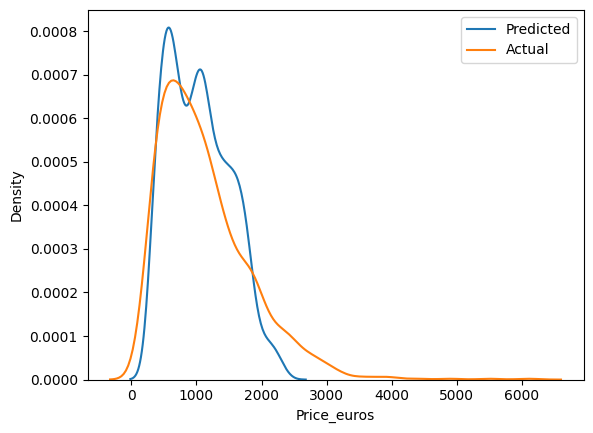

In [199]:
# Let's compare the predicted price and Actual Price

sns.distplot(X['predicted'],hist = False, label = 'Predicted')
sns.distplot(df['Price_euros'], hist = False, label = 'Actual')
plt.legend()
plt.show()

In [200]:
# Actually in RFRegV2 is not thinking is good model as its price is truncating near about 3000 euros
# and maximum price it is not fitting good to actual data, we will not be using it.

RFRegV3 = RandomForestRegressor(n_estimators = 100,
                                max_depth = 15,
                                max_features = 0.75,
                                max_samples = 0.5)

RFRegV3.fit(X_train_new,y_train)

RandomForestRegressor(max_depth=15, max_features=0.75, max_samples=0.5)

In [201]:
y_pred_RFRegV3 = RFRegV3.predict(X_test_new)
y_pred_RFRegV3

array([6.75890169, 5.77457981, 5.87286816, 6.20932772, 7.19073002,
       7.49041674, 6.15451611, 6.64222505, 7.10201766, 5.7647322 ,
       7.09151745, 6.84697628, 7.54578918, 6.94632266, 7.51948084,
       7.06887054, 7.05428943, 5.79231086, 7.52492245, 7.53123969,
       7.44294303, 7.32341507, 6.61800832, 7.05108015, 6.36651123,
       7.53648515, 6.97462539, 6.10084065, 6.99324267, 6.53194493,
       7.18586694, 6.24140099, 6.8089036 , 6.91604154, 7.01924731,
       6.72663836, 7.11448366, 7.23573475, 7.52982978, 7.44371395,
       7.55103715, 7.21133751, 5.90951207, 5.79053278, 6.15824277,
       5.92651513, 6.89917944, 7.58460268, 7.31940754, 7.09418429,
       7.71543831, 7.54257532, 5.97501496, 5.46725534, 6.45522192,
       6.84722195, 6.09949742, 7.20089461, 6.11121723, 6.46241169,
       7.24174108, 7.01062637, 5.48771125, 7.32220734, 7.03545802,
       6.6203688 , 6.0479565 , 7.25683316, 6.70022363, 5.81449335,
       7.01064557, 6.59539841, 6.67485096, 6.4996227 , 7.16133

In [202]:
print('R2_sore: ', metrics.r2_score(y_test,y_pred_RFRegV2))
print('MAE: ', metrics.mean_absolute_error(y_test,y_pred_RFRegV2))
print('MSE: ',metrics.mean_squared_error(y_test,y_pred_RFRegV2))

# Calculate R-squared scores
train_r2 = metrics.r2_score(y_train, RFRegV2.predict(X_train_new))
test_r2 = metrics.r2_score(y_test, y_pred_RFRegV2)

# Print the results
print(f'Training R-squared: {train_r2}')
print(f'Test R-squared: {test_r2}')


R2_sore:  0.83572357883684
MAE:  0.19721247060802555
MSE:  0.06284412886011013
Training R-squared: 0.8312606138533705
Test R-squared: 0.83572357883684


In [203]:
predicted = []

npArrar_df = np.array(train_new)
for i in range(len(npArrar_df)):
    predicted.append(RFRegV3.predict([npArrar_df[i]]))

predicted

[array([7.18885712]),
 array([6.90532832]),
 array([6.5196534]),
 array([7.82666139]),
 array([7.33740115]),
 array([5.95444151]),
 array([7.39652949]),
 array([6.90532832]),
 array([7.4468491]),
 array([6.81047553]),
 array([6.22539101]),
 array([6.00659289]),
 array([7.75141659]),
 array([6.28600667]),
 array([7.1830591]),
 array([7.33740115]),
 array([6.75611314]),
 array([7.82666139]),
 array([6.33385492]),
 array([7.03711986]),
 array([5.48771125]),
 array([6.92110147]),
 array([5.74847883]),
 array([6.79336726]),
 array([6.97404482]),
 array([6.14057916]),
 array([6.94182691]),
 array([6.70559269]),
 array([7.23753251]),
 array([6.80934357]),
 array([5.62758212]),
 array([5.93528965]),
 array([6.18833338]),
 array([7.67837238]),
 array([6.94182691]),
 array([5.66648023]),
 array([5.96977058]),
 array([6.92387533]),
 array([6.41716412]),
 array([6.81402916]),
 array([6.07510481]),
 array([7.32630353]),
 array([6.38276765]),
 array([6.57663961]),
 array([6.98219116]),
 array([7.337

In [204]:
predicted_price_eruro = [np.exp(predicted[i][0]) for i in range(len(predicted))]

In [205]:
predicted_price_eruro

[1324.5884951345706,
 997.5759796670696,
 678.3432339014422,
 2506.547005886473,
 1536.7132265255912,
 385.4615758980789,
 1630.316564865233,
 997.5759796670696,
 1714.4525550630858,
 907.3021551125644,
 505.42062939000476,
 406.09734249006226,
 2324.863469864135,
 537.0046074115158,
 1316.9307285242626,
 1536.7132265255912,
 859.2957328394078,
 2506.547005886473,
 563.3239802078745,
 1138.1049782588866,
 241.7033738540302,
 1013.435649468648,
 313.71308536154527,
 891.9118140346482,
 1068.5360597938645,
 464.32240955841763,
 1034.658719205057,
 816.962086413135,
 1390.65829833147,
 906.2757084955103,
 277.989158633539,
 378.14951109940233,
 487.033727757612,
 2161.0994673626687,
 1034.658719205057,
 289.0154735280634,
 391.4158616948721,
 1016.250679710212,
 612.2643444035256,
 910.5321084379292,
 434.8950793131376,
 1519.7536497288813,
 591.562685035749,
 718.1221001904499,
 1077.2762672750564,
 1536.7132265255912,
 423.2472380117788,
 1288.631917699457,
 672.3011526356194,
 448.5696

In [206]:
X['predicted'] = np.array(predicted_price_eruro)
X.head()

,Company,TypeName,Ram_GB,OpSys,Weight_KG,TouchScreen,IPS,PPI,Cpu_name,HDD,SSD,Gpu_brand,predicted
0,Apple,Ultrabook,8,MaC,1.37,0,1,226.992481,Intel Core i5,0,128,Intel,1324.588495
1,Apple,Ultrabook,8,MaC,1.34,0,0,127.669173,Intel Core i5,0,0,Intel,997.575980
2,HP,Notebook,8,Others,1.86,0,0,141.217949,Intel Core i5,0,256,Intel,678.343234
3,Apple,Ultrabook,16,MaC,1.83,0,1,220.519481,Intel Core i7,0,512,AMD,2506.547006
4,Apple,Ultrabook,8,MaC,1.37,0,1,226.992481,Intel Core i5,0,256,Intel,1536.713227


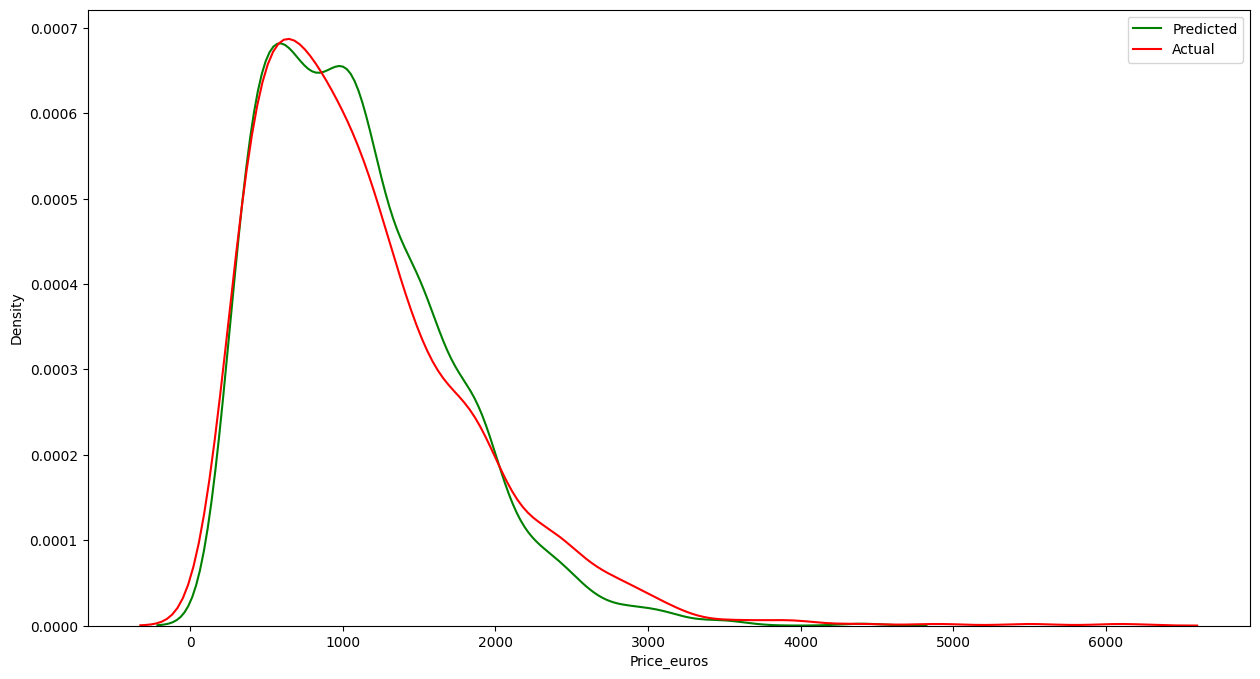

In [207]:
# Let's compare the predicted price and Actual Price

plt.figure(figsize = (15,8))
sns.distplot(X['predicted'],hist = False, label = 'Predicted', color = 'green')
sns.distplot(df['Price_euros'], hist = False, label = 'Actual', color = 'red')
plt.legend()
plt.show()

In [208]:
# The pickle module allows you to serialize and save Python objects, including machine learning models, to a file.

import pickle

file = open('laptopPricePredictor.pkl','wb')
pickle.dump(RFRegV3,file)
file.close()